# Overview of Notebooks

In this notebook the dataset is loaded and preprocessed and filtered for further cleaning and analysis.
In particular we only take a subset of data into account, randomly sample subset of space debris in low earth orbits (apogee < earthradius + 2000km or orbit-time < 128 min and eccentricity < 0.25).
We also clean the imput dataset to use with certain computational tools.
The 'Cleaning_next_part.ipynb' notebook deals with more cleaning of data and some calculations/ visualizations.
In the 'Regression_GPRmodreg.ipynb' we perform Gaussian Process Regression of several key parameters.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Installation of tools for dataset-format conversion
#!pip install -U TLE-tools

In [ ]:
#Pickle compression 
!pip install compress-pickle

In [3]:
#tletools used to evaluate tle (two line element) datasets  
from tletools import TLE
import tletools

#for import of datasets
from os import listdir

# Basic information about dataset (short)

The data has been extracted from 'space-track.com'.
'space-track.com' receives its data from the US Air Force Space Command (AFSPC).
The data consists of a set of TLE (Two Line Element) datasets, which contain information of the orbits (revolutions per day around earth, 4 angles, eccentricity, variations in the number of revolutions and solar radiation) and position of man-made earth orbiting satellites (space debris are also satellites).
An additional datasets gives us information about the different objects, e.g. their name, classification (e.g. space debris or functioning satellites, size classification: small, medium, large).
The orbit data has been calculated with a undisclosed model, general available models for computations have been reverse-engineered in the public community (e.g. in research).

# Basic information about datasets (long) - space-track.com

Apogee
Point in the orbit where an Earth satellite is farthest from the Earth. Units are kilometers. link
Argument of Perigee (Degrees)
The angle between the ascending node and the orbit's point of closest approach to the earth (perigee). link
B* Drag Term
Also called the radiation pressure coefficient. Units are earth radii^-1. The last two characters define an applicable power of 10. link
Catalog Change Report
Report that details the changes (launches, additions, decays and updates) to the satellite catalog (SATCAT). Now parts 4 & 5 of the SSR
Catalog Number
Sequential number assigned by US Air Force as objects are cataloged. Synonyms: Satellite Catalog Number, NORAD_CAT_ID, and OBJECT_NUMBER. link
Celestial Equator
It is a projection of the terrestrial equator out into space. link
Checksum
Sum of all of the characters in the data line, modulo 10. link
Common Name
Also known as OBJECT_NAME, this is simply the name associated with the satellite. link
Complete Data Files
See: link
Conjunction Assessment (CA)
The process of predicting and reporting the close approaches between Resident Space Object (RSOs) or between launch vehicles and RSOs. link
Conjunction Data Message (CDM)
CCSDS Recommended Standard message format for exchanging spacecraft conjunction information between originators of Conjunction Assessments (CAs) and satellite owner/operators and other authorized parties.
Conjunction Summary Message (CSM) - DEPRECATED
The CSM is a fixed-format ASCII formatted message which contains information about a predicted conjunction between space objects.
Country
The nation or group that has responsibility for an object
Current Catalog Files
See: link
Debris
Any object with the string 'DEB' or 'COOLANT' or 'SHROUD' or 'WESTFORD NEEDLES' in the SATCAT object common name. link
Decay
The lessening of the eccentricity of the elliptical orbit of an artificial satellite. link
Decay Date
Date object reentered the earth's atmosphere in YYYY-MM-DD format. link
Decay Message Types
SATCAT - Historical.
Decay Entry - Historical.
TIP Message - Prediction.
60day Decay - Prediction.
Eccentricity
A constant defining the shape of the orbit (0=circular, Less than 1=elliptical). link
Element Number
The ELSET number is a running count of all TLEs generated by 18 SPCS for this object. link
Element Set (ELSET)
See: Two Line Element set.
Element Set Epoch
The first two digits ('13') indicate the year. Add 1900 for years >= 57, and 2000 for all others. The remainder of the field ('236.56031392') is the Julian day of the year. link
Epoch
The specific time at which the position of a satellite is defined. link
First Derivative of the Mean Motion
Is the daily rate of change in the number of revolutions the object completes each day, divided by 2. Units are revolutions/day. link
Geosynchronous Report
Report generated using search parameters of satellite period between 1430-1450 minutes. link
International Designator
Also known as COSPAR designation or NSSDC ID, this is one format for uniquely identifying an object. link
CFSCC
The Combined Force Space Component Command is a component of United States Space Command and is responsible for executing continuous, integrated space operations to deliver theater and global effects in support of national and combatant commander objectives. link
Latest Data
Displays the latest TLE for the object. link
Latest ELSET
Displays the last 5 TLEs for the object. link
Launch Date
Date object was launched in YYYY-MM-DD format. See: link
Launch Site
See: link
Laser Clearinghouse (LCH)
An organization within CFSCC that supports safe and responsible laser activities consistent with the needs of national defense. See: link
Mean Anomaly (degrees)
The angle, measured from perigee, of the satellite location in the orbit referenced to a circular orbit with radius equal to the semi-major axis. link
Mean Equinox
The direction to the equinox at a particular epoch, with the effect of nutation subtracted. link
New Registered User Application
On-line application submitted in order to obtain a user account on Space-Track.org link
Orbit Mean-Elements Message (OMM)
An approved international standard for a mathematical representation of a satellite’s mean orbit IAW CCSDS 502.0-B-2 Orbit Data Messages Blue Book.
Orbital Data Request (ODR)
The ODR is the form submitted by requesters asking for SSA services or information. link
Orbital Data Request Process
The procedures used by Space-Track.org users to request Space Situational Awareness (SSA) advanced services support. link
Orbit Inclination (Degrees)
The angle between the equator and the orbit plane. link
Owner/Operator (O/O)
The designated control center or agency that is the focal point for operational control of a satellite payload, and/or vehicle, and/or ground site. The owner/operator interfaces with USSPACECOM and/or CFSCC and is generally the location where the operations center is located for a given space system.
Payload
Any object not classified in the SATCAT as a rocket body or debris is considered a payload. link
Perigee
Point in the orbit where an Earth satellite is closest to the Earth. Units are kilometers. link
Period
The number of minutes an object takes to make one full orbit. link
Precedence
In the Decay class, lower PRECEDENCE values indicate more recent data. link
Predicted Decay Location
In the TIP class, LAT / LON values show the location above which an object is predicted to arrive at 10km altitude during its descent, not the predicted Earth impact location.
Predicted Decay Time
The time that an object is predicted to reach its decay location. Format: GMT Date (YYYY-MM-DD, HH:MM:SS) +/- XX Hours.
Radar Cross Section (RCS)
A measure of how detectable an object is by radar, measured in square meters. link
Recent Satellite Decays
A listing of recent satellite decays on Space-Track.org. link
Revolution Number at Epoch
The number of orbits the object has completed at Epoch Time. link
Right Ascension (or Longitude) of Ascending Node (degrees)
Is the angle of the ascending node measured EAST of the vernal equinox along the celestial equator. link
Rocket Body
The propulsion unit(s) used to deploy satellites into orbit. These are cataloged differently from standard debris because they can have mechanisms or fuel on board that can affect the orbital behavior of the rocket body even after long periods of time. Rocket bodies are also constructed to endure high temperatures and stresses associated with launch so they have a greater probability of surviving reentry and require closer attention than most debris. Rocket Bodies are any object which contains the strings 'R/B' or 'AKM' (Apogee Kick Motor) or 'PKM' (Perigee Kick Motor) but not 'DEB' (Debris) in the SATCAT object common name. link
Satellite
Any object in orbit around the Earth. Used interchangeably with 'resident space object'. However, commonly and mistakenly used to mean payload. Both a piece of debris and the moon are satellites.(SI 534-03)
Satellite Box Score
Accounting of man-made objects that have been or are in orbit by country. (SI 534-03) link
Satellite Catalog Number
Sequential number assigned by US Air Force as objects are cataloged. Synonyms: Catalog Number, NORAD_CAT_ID, and OBJECT_NUMBER. link
Satellite Catalog (SATCAT)
A catalog of satellite positional data maintained by 18 SPCS.(SI 534-03) link
Satellite Situation Report
Listing of those satellites (objects) currently in orbit and those which have previously orbited the Earth. Some objects are too small or too far from the Earth's surface to be detected; therefore, the Satellite Situation Report does not include all man-made objects orbiting the Earth. link
Second Derivative of the Mean Motion
Measures the second time derivative in daily mean motion. link
SpaceDataSource.org
A deactivated website. Its file sharing functionality was added to space-track.org in 2014.
Space-Track.org 
The website that provides unclassified SSA services and information. Space-Track.org is managed, maintained and administered by CFSCC. link
Space
The area above the lowest altitude that permits a vehicle to orbit the Earth without entering the earth's atmosphere. That altitude is approximately 100 kilometers (62 miles). link
Space Surveillance Data
Data derived from the observation of space and activities occurring in space. link
Space Weather
The conditions and phenomena in space and specifically in the near-Earth environment that may affect space assets or space operations. link
SI 534-03
USSTRATCOM Strategic Instruction (SI) 534-03, Sharing Space Situational Awareness (SSA) Information, 18 January 2013. Establishes standard guidance for providing unclassified SSA information to United States Government (USG) agencies (including organizations supporting the USG under contract) and non-USG entities.
Tracking and Impact Prediction (TIP) Message
Projected satellite reentry predictions for objects which have the potential for generating debris which could pose a hazard to people or property on Earth. link and link
Two Line Element set (TLE)
A mathematical representation of a satellite’s mean orbit. See: link
Three Line Format
Same as a TLE except the first line contains the satellite common name. link
User Agreement
The terms and conditions a potential user must agree to and abide by in order to obtain access to Space-Track.org. link
Vernal Equinox
The point on the celestial sphere at which the Sun passes from south to north of the celestial equator each year. link
Acronyms
AKM	Apogee Kick Motor
DD	Day
DEB	Debris
DoD	Department of Defense
ELSET	Element Set
GMT	Greenwich Mean Time
HH	Hour
CFSCC	Combined Force Space Component Command
MM	Month or Minutes
PKM	Perigee Kick Motor
RCS	Radar Cross Section
SATCAT	Satellite Catalog
SS	Seconds
SSA	Space Situational Awareness
TBA	"To Be Announced" in the future.
TBD	"To Be Determined" or unknown
TIP	Tracking and Impact Prediction
TLE	Two Line Element set
USG	United States Government
USSTRATCOM	United States Strategic Command
USSPACECOM	United States Space Command
YYYY	Year

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Data loading

In [5]:
base_path = 'dec2018-nov2019/'
#base_path = '/content/drive/My Drive/Kickstarter_data/data/' # robin
#data = pd.concat([pd.read_csv(base_path+x) for x in sorted(listdir(base_path))], axis=0)
#data_cp = data.copy()

### Slight formatting of input strings

In [14]:
ltest = '1     5U 58002B   19292.92671750 +.00000171 +00000-0 +22506-3 0  9997'
def line1gen(line1):
    lsplit = line1.split()
    el1 = lsplit[0]
    el2 = lsplit[1]
    # add additional zeros
    if(len(el2) < 6):
        for x in range(6 - len(el2)):
            el2 = '0' + el2
    el3 = lsplit[2]
    # add additional spaces
    if(len(el3) < 8):
        for x in range(8 - len(el3)):
            el3 += " "
    el4 = lsplit[3]
    el5 = lsplit[4] #adjust
    # add additional plus sign
    if(len(el5) < 10):
        el5 = '+' + el5
    el6 = lsplit[5] #adjust
    # add additional plus sign
    if(len(el6) < 8):
        el6 = '+' + el6
    el7 = lsplit[6] #adjust
    # add additional plus sign
    if(len(el7) < 8):
        el7 = '+' + el7
    el8 = lsplit[7]
    el9 = lsplit[8]
    # add additional spaces
    if(len(el9) < 5):
        for x in range(5 - len(el9)):
            el9 = " " + el9;  
    #print(lsplit)
    final = el1 + " " + el2 + " " + el3 + " " + el4 + " " + el5 + " " + el6 + " " + el7 + " " + el8 + " " + el9
    #print(final)
    return (final)

#line1 = ('1 00005U 58002B   00179.78495062  '
#         '.00000023  00000-0  28098-4 0  4753')
#1     5U 58002B   19292.92671750 +.00000171 +00000-0 +22506-3 0  9997

In [26]:
ltest2 = '2     5 034.2474 252.3331 1842730 345.5028 009.8881 10.84775502179024'
def line2gen(line2):
    lsplit = line2.split()
    el1 = lsplit[0]
    el2 = lsplit[1]
    # add additional zeros
    if(len(el2) < 5):
        for x in range(5 - len(el2)):
            el2 = '0' + el2
    el3 = lsplit[2] #adjust 8
    #add additional zeros
    if(len(el3) < 8):
        for x in range(8 - len(el3)):
            el3 = '0' + el3
    el4 = lsplit[3] #adjust 8
    #add additional zeros
    if(len(el4) < 8):
        for x in range(8 - len(el4)):
            el4 = '0' + el4
    el5 = lsplit[4] 
    el6 = lsplit[5] #adjust 8
    #add additional zeros
    if(len(el6) < 8):
        for x in range(8 - len(el6)):
            el6 = '0' + el6
    el7 = lsplit[6] #adjust 8
    #add additional zeros
    if(len(el7) < 8):
        for x in range(8 - len(el7)):
            el7 = '0' + el7
    el8 = lsplit[7] #adjust 17
    #add additional zeros
    if(len(el8) < 17):
        for x in range(17 - len(el8)):
            el8 = '0' + el8
#    print(lsplit)
    final = el1 + " " + el2 + " " + el3 + " " + el4 + " " + el5 + " " + el6 + " " + el7 + " " + el8
 #   print(final)
    return (final)
#line2 = ('2 00005  34.2682 348.7242 1859667 '
#         '331.7664  19.3264 10.82419157413667')
#2     5 034.2474 252.3331 1842730 345.5028 009.8881 10.84775502179024

In [8]:
line1gen(ltest)

'1 00005U 58002B   19292.92671750 +.00000171 +00000-0 +22506-3 0  9997'

In [9]:
line2gen(ltest2)

'2 00005 034.2474 252.3331 1842730 345.5028 009.8881 10.84775502179024'

### Data load

In [27]:
#formatting data

tlecontainer = list()
tledicts = list()
lines1arr = list()
lines2arr = list()
for y in sorted(listdir(base_path)):
    #read data
    file1 = open(base_path + y, 'r')
    lines = file1.readlines()
    for x in range(0, len(lines), 2):
        line1 = lines[x]
        line2 = lines[x + 1]
        line = 'Name\n' + lines[x]+'\n'+lines[x + 1] + '\n'
        #line = lines[x] + lines[x + 1]
        tle_lines = line.strip().splitlines()[0:2] + line.strip().splitlines()[3:]
        # read data as TLE file
        tle = TLE.from_lines(*tle_lines)
        tlecontainer.append(tle)
        # transform information into dictionaries
        tledicts.append(tle.asdict())
        #modify lines with previous functions for strict formatting reasons
        lines1arr.append(line1gen(line1))
        lines2arr.append(line2gen(line2))
        #print(tle)
    file1.close()

    
    

In [28]:
#check subset of dataset
lines2arr[403700:403750]

['2 00340 044.8038 350.9825 2424573 124.0495 287.9013 09.12861299883545',
 '2 00340 044.8038 350.7654 2424575 124.2815 311.3797 09.12861297883834',
 '2 00340 044.8042 350.1163 2424539 124.9741 018.0565 09.12861220883585',
 '2 00341 044.7967 280.5560 2422707 205.6870 330.3497 09.14220313885011',
 '2 00341 044.7969 278.7202 2422779 207.6481 327.3576 09.14220084885383',
 '2 00341 044.7969 275.7439 2422923 210.8278 175.3603 09.14219861885252',
 '2 00341 044.7971 275.0484 2422952 211.5709 321.8699 09.14219812885289',
 '2 00341 044.7973 273.2124 2423042 213.5323 319.1470 09.14219717885378',
 '2 00341 044.7978 271.3773 2423133 215.4925 314.7527 09.14219602885469',
 '2 00341 044.7979 269.5375 2423215 217.4577 319.2287 09.14219487885838',
 '2 00341 044.7981 267.7028 2423325 219.4180 314.6027 09.14219364885644',
 '2 00341 044.7990 265.8698 2423322 221.3748 307.6661 09.14219102885731',
 '2 00341 044.7992 263.8149 2423516 223.5712 330.1937 09.14219059885831',
 '2 00341 044.7994 261.9805 2423613 22

In [ ]:
#line1 = ('1 00005U 58002B   00179.78495062  '
#         '.00000023  00000-0  28098-4 0  4753')
#line2 = ('2 00005  34.2682 348.7242 1859667 '
#         '331.7664  19.3264 10.82419157413667')

#1     5U 58002B   19292.92671750 +.00000171 +00000-0 +22506-3 0  9997
#2     5 034.2474 252.3331 1842730 345.5028 009.8881 10.84775502179024

In [12]:
#tlecontainer
print(tlecontainer[0].astuple())
tlecontainer[0]

('Name', '5', 'U', '58002B', 2018, 344.76834743, -9.7e-07, 0.0, -0.00010533, 999, 34.2432, 136.7746, 0.1846487, 16.5374, 348.806, 10.84800054, 14501)


TLE(name='Name', norad='5', classification='U', int_desig='58002B', epoch_year=2018, epoch_day=344.76834743, dn_o2=-9.7e-07, ddn_o6=0.0, bstar=-0.00010533, set_num=999, inc=34.2432, raan=136.7746, ecc=0.1846487, argp=16.5374, M=348.806, n=10.84800054, rev_num=14501)

In [6]:
# Number of datasets
len(tledicts)

7781519

In [ ]:
#for x in tlecontainer[0]:
 #   print(x)
#    TLE.
#for x in tlecontainer:
#    x.asdict()
#print(tlecontainer[0].asdict())

## Generation of initial dataframe that contains infomration

In [29]:
#construct Dataframe based on dictionaries
df = pd.DataFrame(tledicts)
df['line1'] = lines1arr
df['line2'] = lines2arr
del tledicts

In [30]:
# Generate additional information e.g. about decayed objects (reentered thicker regions of atmosphere), 
# orbiting objects and more broad information e.g. country of origin
dfprop = pd.read_csv('orbiting_objects.csv')
dfdec = pd.read_csv('decayed_objects.csv')
dfbox = pd.read_csv('box-data.csv')

In [31]:
# include both decayed and orbiting object in one dataframe
dfinfotot = pd.concat([dfprop, dfdec])

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [140]:
#Overview of object information, comment and rcsvalue have no relevenant intel,
#inclination and apogee are subject to fluctuations
dfinfotot.iloc[[0,1,2]]

APOGEE COMMENT COUNTRY DECAY  INCLINATION      LAUNCH  NORAD_CAT_ID  \
0   594.0     NaN     PRC   NaN        97.89  2019-11-27         44820   
1   629.0     NaN     PRC   NaN        97.93  2019-11-27         44819   
2   514.0     NaN     TBD   NaN        97.52  2019-11-27         44818   

   OBJECT_ID OBJECT_NAME  PERIGEE  PERIOD  RCSVALUE RCS_SIZE  
0  2019-082B   CZ-4C R/B    418.0   94.74         0    LARGE  
1  2019-082A   GAOFEN 12    628.0   97.28         0    LARGE  
2  2019-081Q    OBJECT Q    500.0   94.75         0    SMALL

In [141]:
#dfinfotot['debc'] = [0 for x in range(len(dfinfotot))]

### Identify decayed objects

In [32]:
idxlist = dfinfotot[dfinfotot.OBJECT_NAME.str.endswith(' DEB')].index
#dfinfotot.iloc[idxlist].debc = [1 for x in range(len(idxlist))]
#dfinfotot.loc[idxlist, 'debc'] = 1
idxlist

Int64Index([   31,    32,    43,    44,    45,    46,   107,   108,   111,
              118,
            ...
            24742, 24746, 24762, 24764, 24765, 24766, 24767, 24768, 24769,
            24773],
           dtype='int64', length=28307)

In [148]:
#dfinfotot['debc'] = [0 for x in range(len(dfinfotot))]
#dfinfotot[dfinfotot.OBJECT_NAME.str.endswith(' DEB')].index
#dfinfotot[dfinfotot.OBJECT_NAME.str.endswith(' DEB')].index.tolist()
#dfinfotot.iloc[[1,2], 'debc'] = 1
#dfinfotot.loc[dfinfotot[dfinfotot.OBJECT_NAME.str.endswith(' DEB')].index, 'debc'] = 1

In [33]:
# identifying decayed and non-decayed objects
dfinfotot['debc'] = dfinfotot.OBJECT_NAME.apply(lambda x: 'True' if str(x).endswith(' DEB') else 'False')
dfprop['debc'] = dfprop.OBJECT_NAME.apply(lambda x: 'True' if str(x).endswith(' DEB') else 'False')
dfdec['debc'] = dfdec.OBJECT_NAME.apply(lambda x: 'True' if str(x).endswith(' DEB') else 'False')

In [149]:
#dfinfotot['debc'] = [0 for x in range(len(dfinfotot))]

In [156]:
# show number of decayed objects
print(len(dfinfotot[dfinfotot.debc == 'True']))
print(len(dfprop[dfprop.debc == 'True']))
print(len(dfdec[dfdec.debc == 'True']))

28307
11903
16404


In [159]:
dfprop[dfprop.debc == 'True'].isna().sum()

OBJECT_ID           0
OBJECT_NAME         0
NORAD_CAT_ID        0
COUNTRY             0
PERIOD            187
INCLINATION       187
APOGEE            187
PERIGEE           187
RCS_SIZE          345
RCSVALUE            0
LAUNCH              0
COMMENT         11716
debc                0
dtype: int64

First we only look at debris components; factor of 2 reduction

In [160]:
#combine table with debris information

In [34]:
df.norad = df.norad.astype(int)

In [35]:
# merge information of non-decayed objects with dataframe based on norad
df_allprop = pd.merge(left=df,right=dfprop, left_on='norad', right_on='NORAD_CAT_ID')

In [36]:
# adjust naming conventions
columnso =list()
for x in df_allprop.columns:
    columnso.append(x.lower())
df_allprop.columns = columnso

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711458 entries, 8223 to 7722161
Data columns (total 30 columns):
m                 float64
argp              float64
bstar             float64
classification    object
ddn_o6            float64
dn_o2             float64
ecc               float64
epoch_day         float64
epoch_year        int64
inc               float64
int_desig         object
n                 float64
name              object
norad             int64
raan              float64
rev_num           int64
set_num           int64
object_id         object
object_name       object
norad_cat_id      int64
country           object
period            float64
inclination       float64
apogee            float64
perigee           float64
rcs_size          object
rcsvalue          int64
launch            object
comment           object
debc              object
dtypes: float64(14), int64(6), object(10)
memory usage: 877.8+ MB


In [37]:
# Only debris objects that have not decayed
df_alldeb = df_allprop[df_allprop.debc == 'True']

In [38]:
df_alldeb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711458 entries, 8223 to 7722161
Data columns (total 32 columns):
m                 float64
argp              float64
bstar             float64
classification    object
ddn_o6            float64
dn_o2             float64
ecc               float64
epoch_day         float64
epoch_year        int64
inc               float64
int_desig         object
n                 float64
name              object
norad             int64
raan              float64
rev_num           int64
set_num           int64
line1             object
line2             object
object_id         object
object_name       object
norad_cat_id      int64
country           object
period            float64
inclination       float64
apogee            float64
perigee           float64
rcs_size          object
rcsvalue          int64
launch            object
comment           object
debc              object
dtypes: float64(14), int64(6), object(12)
memory usage: 934.4+ MB


In [197]:
print(df_alldeb.comment.unique())
print(df_alldeb.rcs_size.unique())
print(df_alldeb.rcsvalue.unique())
print(df_alldeb.period.unique())
print(df_alldeb.classification.unique())
print(df.classification.unique())
print(df_alldeb.object_id.nunique())

[nan 'NO ELEMENTS AVAILABLE']
['SMALL' 'MEDIUM' 'LARGE' nan]
[0]
[101.41 101.18 101.03 ... 119.57 796.01 830.71]
['U']
['U']
11672


In [39]:
# drob some columns that are not needed
df_alldebr = df_alldeb.drop(['norad_cat_id', 'comment', 'rcsvalue', 'classification'], axis = 1)

In [205]:
df_alldebr.period.unique()

array([101.41, 101.18, 101.03, ..., 119.57, 796.01, 830.71])

### Identify LEO objects

In [40]:
# dataframe of objects with a LEO orbit
df_debleo = df_alldebr[((df_alldebr.period <= 128) & (df_alldebr.ecc <= 0.25)) | (df_alldebr.apogee <= 2_000)]

In [249]:
df_debleo.tail(100)

m      argp     bstar    ddn_o6         dn_o2       ecc  \
7721221  338.7334   21.4225  0.000207  0.000016  1.078160e-03  0.001273   
7721222  335.9647   24.1981  0.000201  0.000016  1.055480e-03  0.001280   
7721223    6.5386  353.5553  0.000206  0.000015  9.254700e-04  0.000683   
7721224    6.5925  353.5013  0.000220  0.000015  9.936600e-04  0.000682   
7721225    3.4196  356.6785  0.000215  0.000015  9.832100e-04  0.000690   
7721226    1.6532  358.4473  0.000225  0.000016  1.038100e-03  0.000706   
7721227    0.7033  359.3986  0.000245  0.000017  1.140230e-03  0.000713   
7721228  359.0615    1.0427  0.000228  0.000016  1.067620e-03  0.000721   
7721229  355.8083    4.3008  0.000207  0.000015  9.768700e-04  0.000746   
7721230  353.2624    6.8506  0.000213  0.000016  1.018860e-03  0.000761   
7721231  352.9521    7.1616  0.000223  0.000016  1.075150e-03  0.000766   
7721232  350.7767    9.3405  0.000212  0.000016  1.026250e-03  0.000779   
7721233  348.4957   11.6255  0.000250  0.000018  1.232300e-03  0.000802   
7721234  348.0585   12.0635  0.000263  0.000018  1.304470e-03  0.000807   
7721235  347.0590   13.0648  0.000297  0.000020  1.492040e-03  0.000817   
7721236  344.4641   15.6644  0.000288  0.000020  1.472460e-03  0.000834   
7721237  344.2859   15.8429  0.000304  0.000021  1.557610e-03  0.000834   
7721238  342.0995   18.0333  0.000297  0.000021  1.551240e-03  0.000847   
7721239  341.3201   18.8138  0.000304  0.000022  1.593680e-03  0.000845   
7721240  339.9298   20.2071  0.000272  0.000020  1.435280e-03  0.000863   
7721241  339.0362   21.1027  0.000268  0.000020  1.426280e-03  0.000877   
7721242  337.5800   22.5620  0.000247  0.000019  1.322350e-03  0.000893   
7721243  335.8741   24.2701  0.000230  0.000018  1.239210e-03  0.000880   
7721244  335.5622   24.5834  0.000243  0.000019  1.316170e-03  0.000898   
7721245  333.8850   26.2636  0.000226  0.000018  1.233120e-03  0.000904   
7721246  333.4918   26.6575  0.000225  0.000018  1.230320e-03  0.000905   
7721247  331.1454   29.0086  0.000215  0.000017  1.192080e-03  0.000921   
7721248  331.0410   29.1133  0.000218  0.000018  1.206300e-03  0.000923   
7721249  328.6856   31.4736  0.000205  0.000017  1.149640e-03  0.000942   
7721250  328.6856   31.4736  0.000205  0.000017  1.149640e-03  0.000942   
7721251  356.8695    3.2391  0.000229  0.000016  1.058170e-03  0.000921   
7721252  354.6351    5.4777  0.000212  0.000015  9.865300e-04  0.000932   
7721253  351.7092    8.4092  0.000243  0.000017  1.151820e-03  0.000937   
7721254  349.0696   11.0539  0.000238  0.000017  1.145250e-03  0.000950   
7721255  346.0573   14.0725  0.000218  0.000016  1.059300e-03  0.000973   
7721256  343.3909   16.7442  0.000220  0.000016  1.085000e-03  0.000984   
7721257  343.0021   17.1338  0.000235  0.000017  1.160870e-03  0.000984   
7721258  341.2352   18.9048  0.000224  0.000016  1.120590e-03  0.001005   
7721259  341.2376   18.9024  0.000228  0.000017  1.141540e-03  0.001005   
7721260  338.8723   21.2728  0.000267  0.000019  1.355890e-03  0.001021   
7721261  338.8723   21.2728  0.000267  0.000019  1.355890e-03  0.001021   
7721262  337.5858   22.5623  0.000315  0.000022  1.626900e-03  0.001033   
7721263  336.4931   23.6569  0.000295  0.000021  1.530420e-03  0.001028   
7721264  336.4931   23.6569  0.000295  0.000021  1.530420e-03  0.001028   
7721265  335.2287   24.9247  0.000311  0.000022  1.638700e-03  0.001051   
7721266  334.6467   25.5076  0.000327  0.000024  1.729130e-03  0.001046   
7721267  334.6467   25.5076  0.000327  0.000024  1.729130e-03  0.001046   
7721268  332.3504   27.8085  0.000329  0.000025  1.777330e-03  0.001050   
7721269  331.5999   28.5604  0.000319  0.000024  1.733810e-03  0.001050   
7721270  330.4745   29.6890  0.000305  0.000023  1.678790e-03  0.001070   
7721271  329.1749   30.9916  0.000268  0.000021  1.485180e-03  0.001080   
7721272  328.8968   31.2705  0.000290  0.000022  1.613530e-03  0.001087   
7721273  327.0445   33.1262  0.000251  0.

In [227]:
# only information from at least 2018
#df_debleo = df_debleo[df_debleo.epoch_year >= 2018]

In [41]:
# only information from at least december 2018
# cut out data that preceds december 2018
df_debleo = df_debleo[((df_debleo.epoch_year == 2018) & (df_debleo.epoch_day >= 335)) | (df_debleo.epoch_year == 2019)]

### Choose subset of objects in dataset (randomly)

In [42]:
#choose subject of objects according to their norad; 1/3.5 of all objects
noradset = df_debleo.norad.unique()
drawel = int(len(noradset) / 3.5)
#np.random.permutation(noradset)
noradsubset = np.random.permutation(noradset)[:drawel]

In [43]:
# choose data according to the above subset of objects
df_debleo_r2 = df_debleo[df_debleo.norad.isin(noradsubset)] 
df_debleo_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003419 entries, 11477 to 7721767
Data columns (total 28 columns):
m              1003419 non-null float64
argp           1003419 non-null float64
bstar          1003419 non-null float64
ddn_o6         1003419 non-null float64
dn_o2          1003419 non-null float64
ecc            1003419 non-null float64
epoch_day      1003419 non-null float64
epoch_year     1003419 non-null int64
inc            1003419 non-null float64
int_desig      1003419 non-null object
n              1003419 non-null float64
name           1003419 non-null object
norad          1003419 non-null int64
raan           1003419 non-null float64
rev_num        1003419 non-null int64
set_num        1003419 non-null int64
line1          1003419 non-null object
line2          1003419 non-null object
object_id      1003419 non-null object
object_name    1003419 non-null object
country        1003419 non-null object
period         1003419 non-null float64
inclination    100

In [44]:
# save reduced dataframe to pickle
import pickle
pickle.dump( df_debleo_r2, open( 'df_debleo_r4.p', 'wb' ) )
#df_tot8 = pickle.load(open('df_tot7.p', 'rb'))

### Outdated
Currently not in use, go to 'Cleaning_next_part.ipynb'

In [70]:
#df_debleo_r2.line1

13794      1 00123U 61015H   18343.90708637 +.00000052 +0...
13795      1 00123U 61015H   18344.88151947 +.00000058 +0...
13796      1 00123U 61015H   18345.85595241 .00000060 000...
13797      1 00123U 61015H   18345.92555475 +.00000059 +0...
13798      1 00123U 61015H   18346.89998735 +.00000056 +0...
13799      1 00123U 61015H   18347.87441976 .00000048 000...
13800      1 00123U 61015H   18348.84885195 +.00000044 +0...
13801      1 00123U 61015H   18349.82328392 +.00000046 +0...
13802      1 00123U 61015H   18350.17129526 .00000041 000...
13803      1 00123U 61015H   18350.86731797 +.00000032 +0...
13804      1 00123U 61015H   18351.84174945 +.00000016 +0...
13805      1 00123U 61015H   18352.53777179 .00000003 000...
13806      1 00123U 61015H   18352.81618077 +.00000001 +0...
13807      1 00123U 61015H   18353.58180525 -.00000005 +0...
13808      1 00123U 61015H   18335.90280436 +.00000099 +0...
13809      1 00123U 61015H   18336.87723971 .00000101 000...
13810      1 00123U 6101

In [16]:
idxdroplist = list()
for x in dfdec.NORAD_CAT_ID.unique():
    #print x
    idxdroplist += list(df[df.norad == str(x)].index)
    #for y in df[df.norad == str(x)].index:
        #print(y)
        #idxdroplist.append(y)

In [17]:
idxdroplist

[6231026,
 6231027,
 6231028,
 6231029,
 6231030,
 6231031,
 6231032,
 6231033,
 6231034,
 6231035,
 6231036,
 6231037,
 6231038,
 6231039,
 6231040,
 6231041,
 6231042,
 6231043,
 6231044,
 6231045,
 6231046,
 6231047,
 6231048,
 6231049,
 6231050,
 6231051,
 6481953,
 6032821,
 6032822,
 6032823,
 6032824,
 6032825,
 6032826,
 6032827,
 6032828,
 6032829,
 6032830,
 6032831,
 6032832,
 6032833,
 6032834,
 6032835,
 6032836,
 6032837,
 6032838,
 6032839,
 6032840,
 6032841,
 6032842,
 6032843,
 6032844,
 6032845,
 7781485,
 7781486,
 7781487,
 7781488,
 7781489,
 7781490,
 7781491,
 7781492,
 7781493,
 7781494,
 7781495,
 7781496,
 7781497,
 7781498,
 7781499,
 6031655,
 6031656,
 6031657,
 6031658,
 6031659,
 6031660,
 6031661,
 6682354,
 6682355,
 6682356,
 6682357,
 6682358,
 6682359,
 6682360,
 6682361,
 6682362,
 6896856,
 6896857,
 6896858,
 6896859,
 6896860,
 6896861,
 6896862,
 6896863,
 6896864,
 7157989,
 7157990,
 7157991,
 7157992,
 7157993,
 7157994,
 7157995,
 7157996,


In [18]:
len(idxdroplist)

59354

In [ ]:
df.

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [11]:
df.head(200)

M      argp         bstar classification  ddn_o6         dn_o2  \
0    348.8060   16.5374 -1.053300e-04              U     0.0 -9.700000e-07   
1    345.6685   21.0989 -1.071000e-04              U     0.0 -1.000000e-06   
2    343.0807   24.8310 -1.096500e-04              U     0.0 -1.020000e-06   
3    340.4704   28.5630 -1.057900e-04              U     0.0 -1.000000e-06   
4    337.2449   33.1241 -1.028300e-04              U     0.0 -9.900000e-07   
5    333.9742   37.6851 -1.062000e-04              U     0.0 -1.020000e-06   
6    330.6523   42.2456 -1.079200e-04              U     0.0 -1.040000e-06   
7    323.5119   51.7799 -1.272800e-04              U     0.0 -1.210000e-06   
8    319.9896   56.3392 -1.415100e-04              U     0.0 -1.320000e-06   
9      3.3360  355.5279  1.657400e-04              U     0.0  3.160000e-06   
10   359.4848    0.7602  1.704200e-04              U     0.0  3.220000e-06   
11   359.1348    1.2358  1.692300e-04              U     0.0  3.200000e-06   
12   355.2819    6.4683  1.666700e-04              U     0.0  3.130000e-06   
13   354.9313    6.9439  1.641600e-04              U     0.0  3.080000e-06   
14   351.0667   12.1767  1.652100e-04              U     0.0  3.080000e-06   
15   346.8289   17.8852  1.651300e-04              U     0.0  3.070000e-06   
16   342.5576   23.5937  1.620000e-04              U     0.0  2.990000e-06   
17   341.1244   25.4968  1.600900e-04              U     0.0  2.950000e-06   
18   338.2422   29.3021  1.574400e-04              U     0.0  2.890000e-06   
19   336.0646   32.1563  1.513300e-04              U     0.0  2.770000e-06   
20   333.8721   35.0101  1.530400e-04              U     0.0  2.790000e-06   
21   329.4364   40.7179  1.513900e-04              U     0.0  2.750000e-06   
22   324.9243   46.4252  1.488900e-04              U     0.0  2.700000e-06   
23   323.7829   47.8522  1.486800e-04              U     0.0  2.690000e-06   
24   323.0191   48.8032  1.480800e-04              U     0.0  2.680000e-06   
25   331.1239   40.1221 -4.575300e-05              U     0.0 -8.700000e-07   
26   328.3372   43.7949 -4.953900e-05              U     0.0 -9.400000e-07   
27   327.2829   45.1722 -5.502100e-05              U     0.0 -1.030000e-06   
28   324.0870   49.3040 -5.413400e-05              U     0.0 -1.020000e-06   
29   319.7430   54.8128 -5.485700e-05              U     0.0 -1.040000e-06   
30   315.6693   59.8623 -5.334100e-05              U     0.0 -1.020000e-06   
31   311.8825   64.4525 -5.001600e-05              U     0.0 -9.600000e-07   
32   310.3442   66.2883 -5.094700e-05              U     0.0 -9.800000e-07   
33   307.2249   69.9599 -5.310600e-05              U     0.0 -1.020000e-06   
34   306.0400   71.3367 -5.262800e-05              U     0.0 -1.010000e-06   
35   301.6211   76.3845 -5.500200e-05              U     0.0 -1.040000e-06   
36   297.4979   80.9728 -6.049300e-05              U     0.0 -1.130000e-06   
37   292.8380   86.0202 -6.473800e-05              U     0.0 -1.200000e-06   
38   322.1676   55.3875  2.281800e-04              U     0.0  1.460000e-06   
39   321.2549   56.5929  2.249100e-04              U     0.0  1.430000e-06   
40   315.6522   63.8235  2.207400e-04              U     0.0  1.400000e-06   
41   312.4373   67.8406  2.185800e-04              U     0.0  1.380000e-06   
42   311.4576   69.0457  2.169500e-04              U     0.0  1.370000e-06   
43   311.1295   69.4473  2.176500e-04              U     0.0  1.380000e-06   
44   307.8015   73.4648  2.210000e-04              U     0.0  1.400000e-06   
45   301.5896   80.6950  2.098100e-04              U     0.0  1.330000e-06   
46   300.5250   81.8999  2.062700e-04              U     0.0  1.300000e-06   
47   296.9118   85.9165  2.007000e-04              U     0.0  1.260000e-06   
48   293.9477   89.1297  1.988600e-04              U     0.0  1.250000e-06   
49   292.8190   90.3344  1.969000e-04              U     0.0  1.240000e-06   
50   288.5960   94.7523  1.953500e

In [12]:
df.tail(200)

M      argp     bstar classification    ddn_o6         dn_o2  \
7781319  200.3401  288.4335  0.000000              U  0.000000 -7.000000e-07   
7781320  174.0743  287.6790  0.000000              U  0.000000 -7.000000e-07   
7781321   69.9660  285.5940  0.000000              U  0.000000 -7.000000e-07   
7781322  146.4071  284.5114  0.000000              U  0.000000 -7.000000e-07   
7781323  169.1389  283.2312  0.000056              U  0.000000  1.188000e-05   
7781324  155.4495  282.5589  0.000079              U  0.000000  1.710000e-05   
7781325  133.5970  282.3221  0.000075              U  0.000000  1.622000e-05   
7781326  194.1850  281.0234  0.000064              U  0.000000  1.374000e-05   
7781327  287.4066  279.6983  0.000035              U  0.000000  7.250000e-06   
7781328  143.4059  278.6392  0.000039              U  0.000000  8.060000e-06   
7781329  181.2075  277.5793  0.000038              U  0.000000  7.880000e-06   
7781330  289.6812  276.2579  0.000026              U  0.000000  5.160000e-06   
7781331  215.6301  275.0146  0.000033              U  0.000000  6.740000e-06   
7781332  241.3225  273.5399  0.000033              U  0.000000  6.700000e-06   
7781333  278.7277  272.3249  0.000031              U  0.000000  6.320000e-06   
7781334  217.7081  271.0409  0.000036              U  0.000000  7.350000e-06   
7781335  244.1480  269.9004  0.000037              U  0.000000  7.670000e-06   
7781336  147.4218  268.4046  0.000038              U  0.000000  7.930000e-06   
7781337  150.1045  267.3059  0.000041              U  0.000000  8.400000e-06   
7781338  163.8418  266.0886  0.000042              U  0.000000  8.700000e-06   
7781339  174.6900  264.8550  0.000041              U  0.000000  8.580000e-06   
7781340  181.4283  264.2605  0.000043              U  0.000000  8.890000e-06   
7781341  254.2834  262.6806  0.000044              U  0.000000  9.140000e-06   
7781342  256.4857  261.9555  0.000041              U  0.000000  8.600000e-06   
7781343  295.0738  260.8220  0.000042              U  0.000000  8.710000e-06   
7781344  292.8005  259.4292  0.000045              U  0.000000  9.480000e-06   
7781345  240.1137  258.0987  0.000044              U  0.000000  9.270000e-06   
7781346  296.3770  256.6747  0.000042              U  0.000000  8.780000e-06   
7781347  294.1585  255.3008  0.000043              U  0.000000  8.930000e-06   
7781348  254.7114  253.7597  0.000041              U  0.000000  8.500000e-06   
7781349  197.9946  252.5569  0.000039              U  0.000000  8.170000e-06   
7781350  171.2818  251.5608  0.000040              U  0.000000  8.330000e-06   
7781351  227.9650  249.9555  0.000041              U  0.000000  8.610000e-06   
7781352  167.7427  248.2382  0.000044              U  0.000000  9.200000e-06   
7781353  169.2073  246.8750  0.000047              U  0.000000  9.820000e-06   
7781354  232.1981  245.6206  0.000050              U  0.000000  1.062000e-05   
7781355  348.6118   47.4985  0.000500              U  0.000000  1.610000e-06   
7781356  348.6246   47.4545  0.000521              U  0.000000  1.690000e-06   
7781357  348.6459   47.3830  0.000241              U  0.000000  1.090000e-06   
7781358  348.6611   47.3364  0.000307              U  0.000000  1.300000e-06   
7781359  348.6900   47.2489  0.000636              U  0.000000  2.170000e-06   
7781360  348.7056   47.1980  0.000727              U  0.000000  2.390000e-06   
7781361  348.7159   47.1600  0.000654              U  0.000000  2.170000e-06   
7781362  348.7288   47.1064  0.000553              U  0.000000  1.850000e-06   
7781363  348.7357   47.0745  0.000514              U  0.000000  1.710000e-06   
7781364  350.4839   37.8954  0.000306              U  0.000000  1.560000e-06   
7781365  350.5264   37.7647  0.000920              U  0.000000  3.660000e-06   
7781366  350.5587   37.6601  0.001172              U  0.000000  4.520000e-06   
7781367  350.5729   37.6082  0.001376              U  0.000000  5.150000e-06   
7781368  350.588

In [13]:
dfprop.head(200)

OBJECT_ID              OBJECT_NAME  NORAD_CAT_ID COUNTRY   PERIOD  \
0     2019-082B                CZ-4C R/B         44820     PRC    94.74   
1     2019-082A                GAOFEN 12         44819     PRC    97.28   
2     2019-081Q                 OBJECT Q         44818     TBD    94.75   
3     2019-081P                 OBJECT P         44817     TBD    94.75   
4     2019-081N                 OBJECT N         44816     TBD    94.76   
5     2019-081M                 OBJECT M         44815     TBD    94.76   
6     2019-081L                 OBJECT L         44814     TBD    94.77   
7     2019-081K                 OBJECT K         44813     TBD    94.77   
8     2019-081J                 OBJECT J         44812     TBD    94.77   
9     2019-081H                 OBJECT H         44811     TBD    94.77   
10    2019-081G                 OBJECT G         44810     TBD    94.78   
11    2019-081F                 OBJECT F         44809     TBD    94.79   
12    2019-081E                 OBJECT E         44808     TBD    94.79   
13    2019-081D                 OBJECT D         44807     TBD    94.79   
14    2019-081C                 OBJECT C         44806     TBD    94.79   
15    2019-081B                 PSLV R/B         44805     IND    95.22   
16    2019-081A               CARTOSAT 3         44804     IND    94.82   
17    2019-080D     ARIANE 5 DEB (SYLDA)         44803      FR   630.52   
18    2019-080C             ARIANE 5 R/B         44802      FR   625.22   
19    2019-080B             INMARSAT GX5         44801      IM   630.88   
20    2019-080A                   TIBA-1         44800    EGYP  1154.19   
21    2019-079C                 SL-4 R/B         44799     CIS    91.03   
22    2019-079B                VOLGA R/B         44798     CIS    96.98   
23    2019-079A              COSMOS 2542         44797     CIS    96.96   
24    2019-078D                CZ-3B R/B         44796     PRC   327.31   
25    2019-078C                 YZ-1 R/B         44795     PRC   808.75   
26    2019-078B              BEIDOU 3M22         44794     PRC   787.26   
27    2019-078A              BEIDOU 3M21         44793     PRC   787.42   
28   1998-067QX              NARSSCUBE-1         44792    EGYP    92.86   
29   1998-067QW                    AQT-D         44791     JPN    92.86   
30   1998-067QV                 RWASAT-1         44790     RWA    92.85   
31   1998-067QU                  ISS DEB         44789     ISS    92.87   
32   1998-067QT                  ISS DEB         44788     ISS    92.86   
33    2019-077C                KZ-1A R/B         44787     PRC    99.15   
34    2019-077B               KL-ALPHA B         44786     PRC   110.25   
35    2019-077A               KL-ALPHA A         44785     PRC   106.21   
36    2019-076F                 CZ-6 R/B         44784     PRC   101.59   
37    2019-076E              NINGXIA-1 5         44783     PRC   102.73   
38    2019-076D              NINGXIA-1 4         44782     PRC   102.76   
39    2019-076C              NINGXIA-1 3         44781     PRC   102.79   
40    2019-076B              NINGXIA-1 2         44780     PRC   102.81   
41    2019-076A              NINGXIA-1 1         44779     PRC   102.84   
42    2019-075A       JILIN-01 GAOFEN 2A         44777     PRC    95.42   
43   2019-074BR             FALCON 9 DEB         44776      US    89.82   
44   2019-074BQ             FALCON 9 DEB         44775      US    89.86   
45   2019-074BP             FALCON 9 DEB         44774      US    89.93   
46   2019-074BN             FALCON 9 DEB         44773      US    89.94   
47   2019-074BM            STARLINK-1068         44772      US    91.53   
48   2019-074BL            STARLINK-1067         44771      US    92.68   
49   2019-074BK            STARLINK-1065         44770      US    92.70   
50   2019-074BJ            STARLINK-1064         44769      US    92.71   
51   2019-074BH            STARLINK-1063         44768      US    92.71   
52   2019-074BG            STAR

In [14]:
dfprop.tail(200)

OBJECT_ID             OBJECT_NAME  NORAD_CAT_ID COUNTRY   PERIOD  \
19821  1961-015HA       THOR ABLESTAR DEB           649      US   113.88   
19822  1961-015GZ       THOR ABLESTAR DEB           648      US   106.12   
19823  1961-015GW       THOR ABLESTAR DEB           645      US   110.47   
19824  1961-015GV       THOR ABLESTAR DEB           644      US   106.05   
19825  1961-015GU       THOR ABLESTAR DEB           643      US   108.26   
19826   1963-030B                   ERS 9           635      US   167.85   
19827   1963-031A         SYNCOM 2 (A 26)           634      US  1436.11   
19828   1963-030E       ATLAS AGENA B DEB           631      US   168.24   
19829   1963-030C       ATLAS AGENA B DEB           630      US   167.47   
19830   1963-014G        WESTFORD NEEDLES           629      US   166.37   
19831   1963-014F        WESTFORD NEEDLES           628      US   166.79   
19832   1963-030A          MIDAS 7/ERS 10           622      US   167.85   
19833   1963-025B           HITCH HIKER 1           614      US    98.79   
19834   1963-014C                   ERS 6           608      US   166.42   
19835   1963-014E        WESTFORD NEEDLES           602      US   166.05   
19836   1963-014D                  DASH 1           589      US   166.36   
19837   1963-013B             DELTA 1 R/B           575      US   224.92   
19838   1963-014A      MIDAS 6 (FTV 1169)           574      US   166.42   
19839   1963-013A        TELSTAR 2 (A-41)           573      US   225.26   
19840   1963-008B                  LUNA 4           566     CIS      NaN   
19841  1961-015GT       THOR ABLESTAR DEB           561      US   116.12   
19842  1961-015GS       THOR ABLESTAR DEB           560      US   106.64   
19843  1961-015GR       THOR ABLESTAR DEB           559      US    99.70   
19844  1961-015GQ       THOR ABLESTAR DEB           558      US   112.00   
19845   1963-004A                SYNCOM 1           553      US  1426.51   
19846  1961-015GM       THOR ABLESTAR DEB           552      US   103.45   
19847  1961-015GJ       THOR ABLESTAR DEB           549      US   107.81   
19848  1961-015GH       THOR ABLESTAR DEB           548      US    98.33   
19849  1961-015GE       THOR ABLESTAR DEB           545      US   105.19   
19850  1961-015GD       THOR ABLESTAR DEB           544      US   106.30   
19851  1961-015GC       THOR ABLESTAR DEB           543      US   105.25   
19852  1961-015GA       THOR ABLESTAR DEB           541      US   103.99   
19853  1961-015FX       THOR ABLESTAR DEB           538      US    99.63   
19854  1961-015FW       THOR ABLESTAR DEB           537      US   105.67   
19855  1961-015FU       THOR ABLESTAR DEB           530      US   102.98   
19856  1961-015FT       THOR ABLESTAR DEB           516      US   103.50   
19857   1962-068B             DELTA 1 R/B           515      US   184.80   
19858   1962-049D        THOR AGENA B DEB           511      US   105.25   
19859   1962-049C        THOR AGENA B DEB           510      US   105.13   
19860   1962-070A             EXPLORER 16           506      US   103.96   
19861   1962-068A          RELAY 1 (A-15)           503      US   185.05   
19862  1961-015FS       THOR ABLESTAR DEB           480      US   100.48   
19863  1961-015FR       THOR ABLESTAR DEB           479      US    96.45   
19864  1961-015FQ       THOR ABLESTAR DEB           478      US    98.80   
19865  1961-015FM       THOR ABLESTAR DEB           475      US   102.08   
19866  1961-015FL       THOR ABLESTAR DEB           474      US    97.40   
19867  1961-015FG       THOR ABLESTAR DEB           470      US   102.47   
19868  1961-015FF       THOR ABLESTAR DEB           469      US   100.79   
19869  1961-015FD       THOR ABLESTAR DEB           467      US   106.74   
19870  1961-015FB       THOR ABLESTAR DEB           465      US   100.57   
19871  1961-015EZ       THOR ABLESTAR DEB           463      US    99.78   
19872  1961-015EX       THOR ABLESTAR DEB           461 

In [15]:
dfdec.tail(200)

OBJECT_ID              OBJECT_NAME  NORAD_CAT_ID COUNTRY    PERIOD  \
24598  1961-015CS        THOR ABLESTAR DEB           301      US     91.69   
24599  1961-015CR        THOR ABLESTAR DEB           300      US     94.33   
24600   1962-020B                 SL-7 R/B           298     CIS     91.11   
24601   1962-020A    COSMOS 5 (SPUTNIK 15)           297     CIS     88.64   
24602   1962-019B            ATLAS D 7 R/B           296      US     88.80   
24603   1962-019A          MERCURY ATLAS 7           295      US     88.60   
24604   1962-018C             FTV 1126 DEB           294      US     89.95   
24605   1962-018B             FTV 1126 DEB           293      US     89.80   
24606   1962-018A                 FTV 1126           292      US     88.51   
24607   1962-017B             FTV 1125 DEB           291      US       NaN   
24608   1962-017A                 FTV 1125           290      US     89.86   
24609   1962-014C                 SL-3 DEB           289     CIS       NaN   
24610   1962-015B              DELTA 1 R/B           288      US     88.46   
24611   1962-014A    COSMOS 4 (SPUTNIK 14)           287     CIS     90.60   
24612   1962-016A       SAMOS 7 (FTV 2401)           286      US       NaN   
24613   1962-015A           ARIEL 1 (UK-1)           285      UK     88.25   
24614   1962-014B                 SL-3 R/B           284     CIS     88.28   
24615   1962-013B                 SL-7 R/B           283     CIS     89.50   
24616   1962-013A    COSMOS 3 (SPUTNIK 13)           281     CIS     88.96   
24617   1962-012A                 RANGER 4           280      US       NaN   
24618   1962-011D             FTV 1154 DEB           279      US       NaN   
24619   1962-011C             FTV 1154 DEB           278      US       NaN   
24620   1962-011B             FTV 1154 DEB           277      US       NaN   
24621   1962-011A                 FTV 1154           276      US     88.10   
24622  1961-015CP        THOR ABLESTAR DEB           275      US     88.78   
24623   1962-010B              MIDAS 5 DEB           272      US    114.09   
24624   1962-009B                 SL-7 R/B           270     CIS     89.99   
24625   1962-009A    COSMOS 2 (SPUTNIK 12)           269     CIS     88.37   
24626   1962-008B                 SL-7 R/B           267     CIS     89.32   
24627   1962-008A    COSMOS 1 (SPUTNIK 11)           266     CIS     89.74   
24628  1961-015CM        THOR ABLESTAR DEB           265      US     91.27   
24629   1962-007C        ATLAS AGENA B R/B           259      US     88.44   
24630   1962-007B  SAMOS 6 DEB (REFLECTOR)           258      US     88.93   
24631   1962-006B              DELTA 1 R/B           257      US     89.24   
24632   1962-007A                  SAMOS 6           256      US     87.58   
24633   1962-006A                    OSO 1           255      US     87.42   
24634   1962-005D        DISCOVERER 38 DEB           251      US     89.65   
24635  1961-015CC        THOR ABLESTAR DEB           250      US     90.53   
24636   1962-005C        DISCOVERER 38 DEB           249      US     89.09   
24637   1962-005B        DISCOVERER 38 DEB           248      US     88.95   
24638   1962-005A            DISCOVERER 38           247      US     88.32   
24639   1962-004A                 FTV 2301           242      US     88.39   
24640   1962-003B              ATLAS D R/B           241      US     88.13   
24641   1962-003A          MERCURY ATLAS 6           240      US     88.48   
24642  1961-015BX        THOR ABLESTAR DEB           239      US     90.76   
24643  1961-015BW        THOR ABLESTAR DEB           238      US     92.21   
24644  1961-015BV        THOR ABLESTAR DEB           237      US     89.87   
24645  1961-015BU        THOR ABLESTAR DEB           236      US     93.43   
24646  1961-015BP        THOR ABLESTAR DEB           231      US     88.93   
24647   1962-002D              DELTA 1 R/B           229      US     87.73   
24648  1961-015BJ        THOR 

In [16]:
dfdec.head(200)

OBJECT_ID           OBJECT_NAME  NORAD_CAT_ID COUNTRY   PERIOD  \
0     2019-075B             KZ-1A R/B         44778     PRC    87.59   
1     2019-071B           ANTARES R/B         44702      US    87.54   
2     2019-064B              SL-4 R/B         44551     CIS    87.33   
3     2019-062A                 HTV-8         44546     JPN    89.94   
4     2019-060B             CZ-11 R/B         44535     PRC    88.39   
5    2019-006EF        MICROSAT-R DEB         44522     IND    91.69   
6    1998-067QS               ISS DEB         44515     CIS    91.92   
7     2019-055B              SL-4 R/B         44505     CIS    87.38   
8     2019-055A           SOYUZ MS-14         44504     CIS    92.88   
9    2019-006DZ        MICROSAT-R DEB         44501     IND    89.34   
10    2019-032R             CZ-11 DEB         44492     PRC    88.29   
11   2019-006EE        MICROSAT-R DEB         44491     IND    91.28   
12   2019-006ED        MICROSAT-R DEB         44490     IND    89.89   
13   2019-006EC        MICROSAT-R DEB         44489     IND    92.20   
14   2019-006DY        MICROSAT-R DEB         44474     IND    88.18   
15   2019-006DX        MICROSAT-R DEB         44473     IND    90.50   
16   2019-006DS        MICROSAT-R DEB         44468     IND    90.02   
17   2019-006DR        MICROSAT-R DEB         44467     IND    89.85   
18   2019-006DQ        MICROSAT-R DEB         44466     IND    90.73   
19   2019-006DP        MICROSAT-R DEB         44465     IND    90.31   
20   2019-006DN        MICROSAT-R DEB         44464     IND    88.50   
21   2019-006DL        MICROSAT-R DEB         44462     IND    89.75   
22   2019-006DK        MICROSAT-R DEB         44461     IND    92.74   
23   2019-006DJ        MICROSAT-R DEB         44460     IND    90.55   
24    2019-047B              SL-4 R/B         44456     CIS    86.95   
25    2019-047A        PROGRESS MS-12         44455     CIS    92.92   
26    2019-044C     DRAGON CRS-18 DEB         44448      US    87.61   
27    2019-044B     DRAGON CRS-18 DEB         44447      US    88.06   
28    2019-044A         DRAGON CRS-18         44446      US    92.67   
29   2019-006DH        MICROSAT-R DEB         44445     IND    88.86   
30   2019-006DG        MICROSAT-R DEB         44444     IND    90.25   
31    2019-043A                CAS 7B         44443     PRC    88.67   
32    2019-042B              GSLV R/B         44442     IND    91.77   
33    2019-041B              SL-4 R/B         44438     CIS    87.21   
34    2019-040B       BLOCK DM-SL R/B         44433     CIS      NaN   
35    2019-040A             SPEKTR RG         44432     CIS      NaN   
36   2019-006DF        MICROSAT-R DEB         44384     IND    89.13   
37   2019-006DB        MICROSAT-R DEB         44380     IND    88.34   
38   2019-006DA        MICROSAT-R DEB         44379     IND    88.83   
39   2019-006CZ        MICROSAT-R DEB         44378     IND    88.40   
40   2019-006CY        MICROSAT-R DEB         44377     IND    88.58   
41   2019-036AA   OCULUS-ASR SPHERE 1         44376      US    91.86   
42    2019-037J          ELECTRON DEB         44373      US    91.11   
43    2019-035B             CZ-3B R/B         44338     PRC   101.51   
44    2019-032Q             CZ-11 DEB         44328     PRC    89.57   
45    2019-032P             CZ-11 DEB         44327     PRC    89.11   
46    2019-032N             CZ-11 DEB         44326     PRC    93.35   
47    2019-032L             CZ-11 DEB         44320     PRC    88.71   
48    2019-026D          ELECTRON R/B         44228      US    87.86   
49    2019-025C     DRAGON CRS-17 DEB         44224      US    87.34   
50    2019-025B     DRAGON CRS-17 DEB         44223      US    87.20   
51    2019-025A         DRAGON CRS-17         44222      US    92.69   
52   2019-006CX        MICROSAT-R DEB         44221     IND    87.96   
53   2019-006CW        MICROSAT-R DEB         44220     IND    88.82   
54   2019-006CV        MICROSAT-R DEB         

In [ ]:
df[df.norad == '29517'].epoch_day

In [ ]:
df.describe()

In [ ]:
print(df.int_desig.nunique(), df.norad.nunique())

In [ ]:
df = pd.DataFrame(tlecontainer)

In [ ]:
df.head()

In [17]:
import matplotlib.pyplot as plt

In [ ]:
date = df[df.norad == '29517'].epoch_year + df[df.norad == '29517'].epoch_day / 366

In [ ]:
for x in df.norad.unique():
    print(x)

In [202]:
mu = 3.986004418E5 * (3600 * 24) ** 2
earthreq = 6378
def apogeecal(n, ecc):
    return np.power(mu / (4. * (np.pi * n) ** 2), 1. / 3.) * (1 + ecc)
def perigeecal(n, ecc):
    return np.power(mu / (4. * (np.pi * n) ** 2), 1. / 3.) * (1 - ecc)

In [195]:
print(apogeecal(14) - earthreq)
print(perigeecal(14, 0.25) - earthreq)

893.9321406855279
663.0180189063749


In [196]:
plt.figure(figsize = (20,20))
for x in df[(df.ecc <= 0.25) & (df.n >= 10) & (df.n <= 12)].norad.unique():
    el = str(x) #29517 24812
    dfsub = df[df.norad == el]
    list1 = dfsub.epoch_year
    if len(list1) > 100 and dfsub.ecc.abs().max() / dfsub.ecc.abs().min() > 1.01:
        date = list1 + dfsub.epoch_day / 366
        plt.plot(date, apogeecal(dfsub.n))
#plt.ylim(-0.001, 0.001)
#plt.ylim(0.425,0.43)

KeyboardInterrupt: 

<Figure size 1440x1440 with 0 Axes>

In [135]:
dfprop.NORAD_CAT_ID.unique()

array([44820, 44819, 44818, ...,    12,    11,     5])

In [241]:
df[df.epoch_year < 2018].count()

M                 861
argp              861
bstar             861
classification    861
ddn_o6            861
dn_o2             861
ecc               861
epoch_day         861
epoch_year        861
inc               861
int_desig         861
n                 861
name              861
norad             861
raan              861
rev_num           861
set_num           861
dtype: int64

In [260]:
import random
import time

1

In [281]:
set(dfprop.NORAD_CAT_ID.unique())

{5,
 11,
 12,
 16,
 20,
 22,
 27,
 29,
 45,
 46,
 47,
 50,
 51,
 52,
 53,
 58,
 59,
 80,
 82,
 85,
 107,
 112,
 113,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 130,
 131,
 132,
 133,
 134,
 136,
 138,
 141,
 144,
 145,
 147,
 148,
 150,
 152,
 154,
 155,
 158,
 159,
 162,
 163,
 167,
 172,
 177,
 178,
 188,
 192,
 194,
 195,
 196,
 202,
 204,
 205,
 210,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 230,
 232,
 233,
 234,
 235,
 243,
 244,
 245,
 246,
 252,
 253,
 254,
 260,
 261,
 262,
 263,
 264,
 268,
 271,
 273,
 274,
 282,
 299,
 309,
 312,
 318,
 320,
 323,
 324,
 325,
 327,
 329,
 330,
 333,
 334,
 335,
 336,
 337,
 340,
 341,
 350,
 351,
 353,
 354,
 355,
 357,
 369,
 374,
 375,
 397,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 414,
 416,
 417,
 420,
 424,
 426,
 439,
 440,
 446,
 447,
 450,
 461,
 463,
 465,
 467,
 469,
 470,
 474,
 475,
 478,
 479,
 480,
 503,
 506,
 510,
 511,
 515,
 516,
 530,
 537,
 538,
 541,
 543,
 

In [282]:
set(df.norad.unique())

{'18351',
 '38529',
 '2811',
 '34857',
 '39134',
 '40107',
 '27728',
 '12693',
 '29524',
 '43025',
 '34187',
 '23407',
 '21452',
 '39913',
 '33699',
 '6828',
 '25175',
 '30792',
 '30302',
 '41594',
 '27540',
 '18415',
 '32031',
 '14407',
 '41668',
 '22547',
 '42558',
 '42738',
 '1608',
 '30805',
 '2651',
 '33605',
 '43990',
 '37588',
 '44206',
 '25999',
 '32976',
 '26736',
 '25320',
 '3679',
 '43226',
 '33059',
 '3244',
 '42798',
 '39022',
 '41720',
 '671',
 '33630',
 '14739',
 '29978',
 '8132',
 '30381',
 '32573',
 '9962',
 '30128',
 '900',
 '39093',
 '42554',
 '10657',
 '39991',
 '20122',
 '13827',
 '39466',
 '545',
 '23171',
 '26449',
 '41280',
 '39763',
 '40834',
 '30080',
 '21178',
 '21138',
 '43689',
 '38001',
 '42927',
 '42321',
 '629',
 '13113',
 '26082',
 '35668',
 '38213',
 '12636',
 '14914',
 '17078',
 '38136',
 '34166',
 '40010',
 '20066',
 '5778',
 '12791',
 '40986',
 '35613',
 '34390',
 '39189',
 '39212',
 '43099',
 '30266',
 '40519',
 '42864',
 '30744',
 '15475',
 '42821

In [284]:
list(set(dfprop.NORAD_CAT_ID.astype(str).unique()).intersection(set(df.norad.unique())))

['18351',
 '38529',
 '2811',
 '34857',
 '39134',
 '40107',
 '27728',
 '12693',
 '29524',
 '43025',
 '34187',
 '23407',
 '21452',
 '39913',
 '33699',
 '6828',
 '25175',
 '30792',
 '30302',
 '41594',
 '27540',
 '18415',
 '32031',
 '14407',
 '41668',
 '22547',
 '42558',
 '42738',
 '1608',
 '30805',
 '2651',
 '33605',
 '43990',
 '37588',
 '25999',
 '32976',
 '26736',
 '25320',
 '3679',
 '43226',
 '33059',
 '3244',
 '42798',
 '39022',
 '41720',
 '671',
 '33630',
 '14739',
 '29978',
 '8132',
 '30381',
 '32573',
 '9962',
 '30128',
 '900',
 '39093',
 '42554',
 '10657',
 '39991',
 '20122',
 '13827',
 '39466',
 '545',
 '23171',
 '26449',
 '41280',
 '39763',
 '43689',
 '40834',
 '21178',
 '21138',
 '30080',
 '38001',
 '42927',
 '42321',
 '629',
 '13113',
 '26082',
 '35668',
 '38213',
 '12636',
 '14914',
 '17078',
 '38136',
 '34166',
 '40010',
 '20066',
 '5778',
 '12791',
 '40986',
 '35613',
 '34390',
 '39189',
 '39212',
 '43099',
 '30266',
 '40519',
 '42864',
 '30744',
 '15475',
 '20394',
 '42417

28355


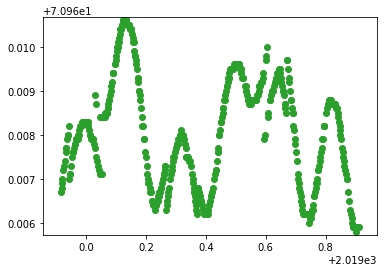

7386.527442963276
30364


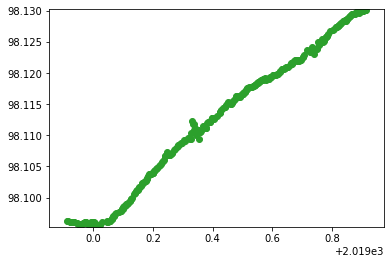

7311.040444589402
35583


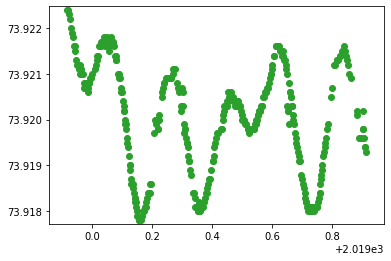

7446.354186845558
33870


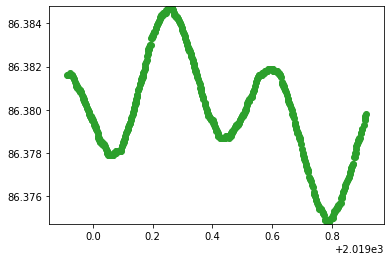

7152.635607368327
43139


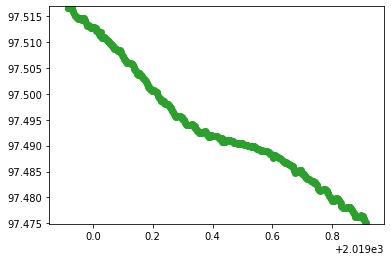

6871.977731736504
9821


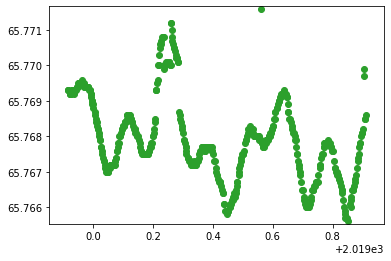

7172.981666114568
11436


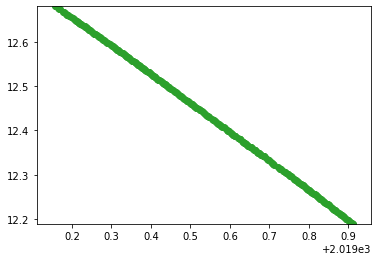

42399.322190539315
41949


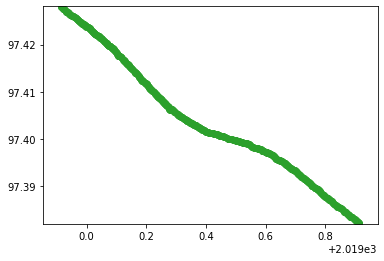

6873.819915018488
31882


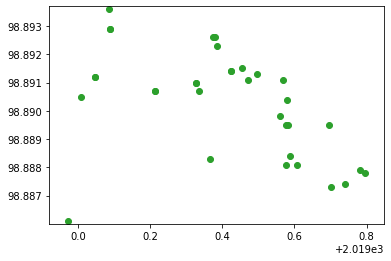

7246.201039678974
14441


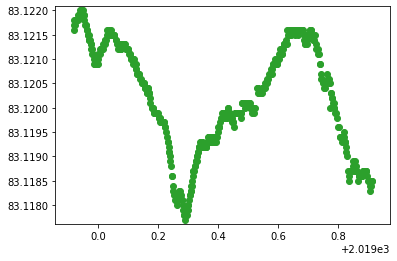

7266.410274878162
32989


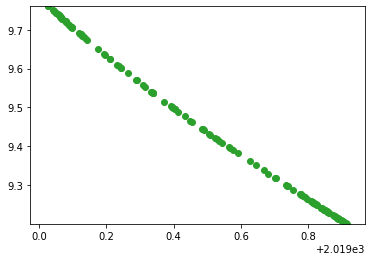

27960.040682409934
40877


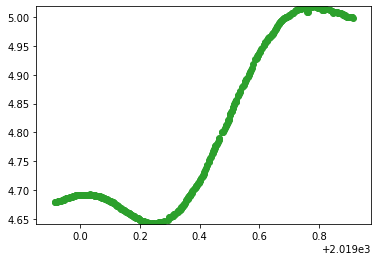

20297.751073220537
13353


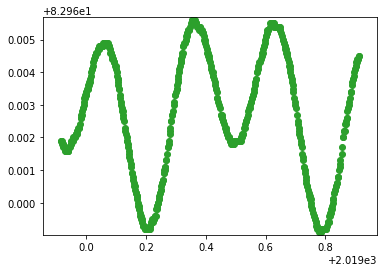

7354.912571527311
30048


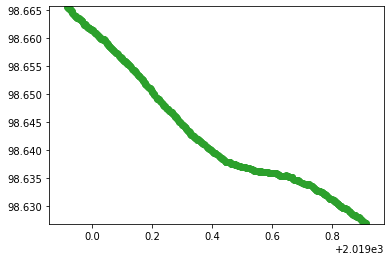

7347.885151339367
44743


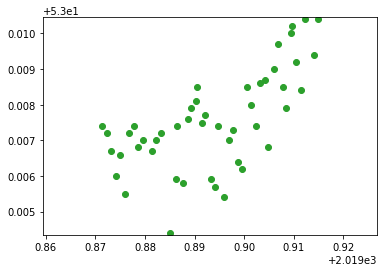

6769.806546627963
9697


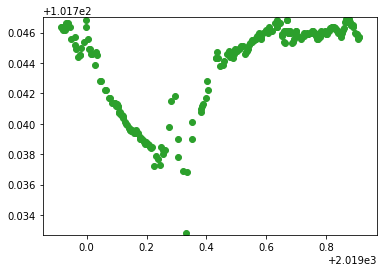

7828.983164185001
30805


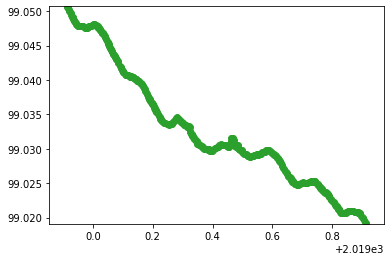

7276.104472587592
43349


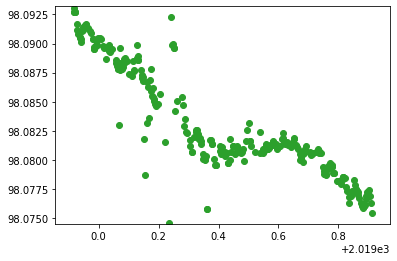

6985.53874305424
26987


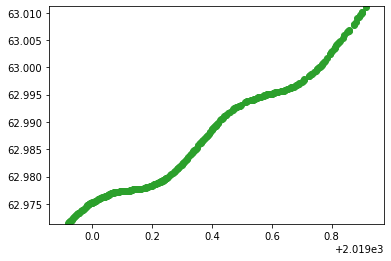

25507.76500392754
27089


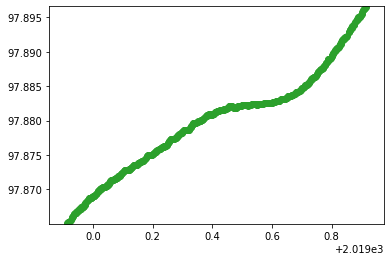

6976.397294701247
27150


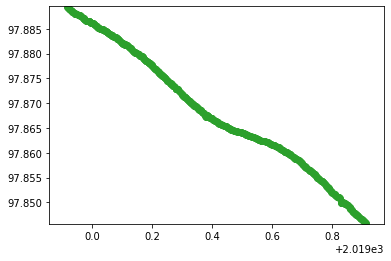

6895.850517751627
14408


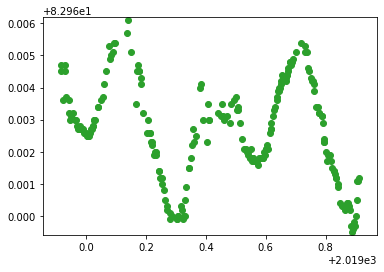

7383.789088413046
23778


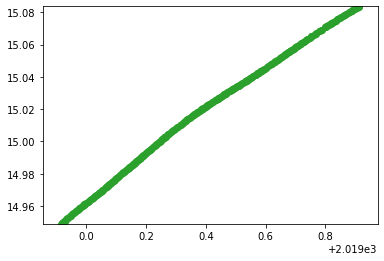

42909.78594488926
30334


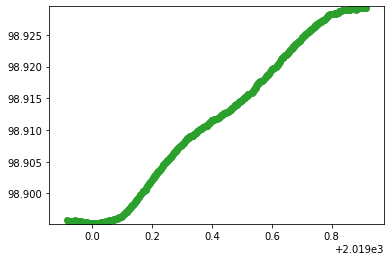

7331.74823053831
27945


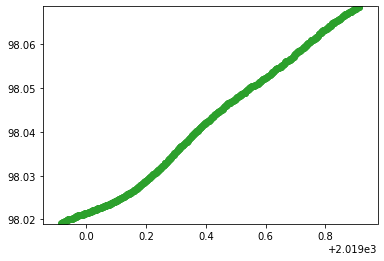

7055.805575603497
42872


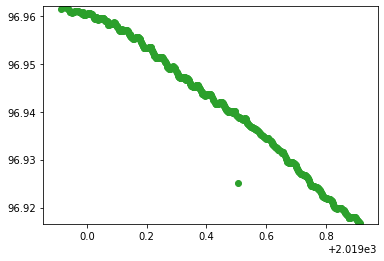

6830.586630089408
38957


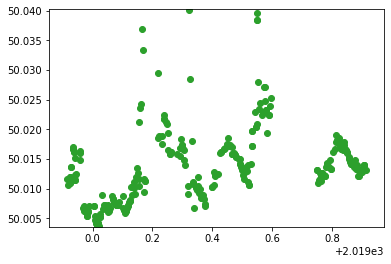

8038.871715588474
32995


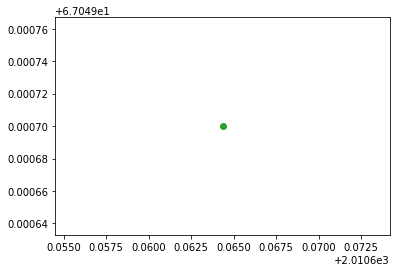

26817.340676988217
2379


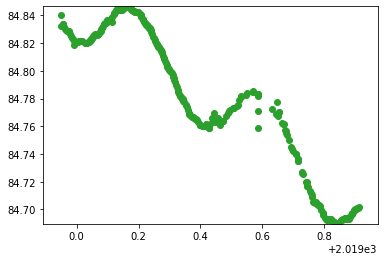

9866.323835214667
30522


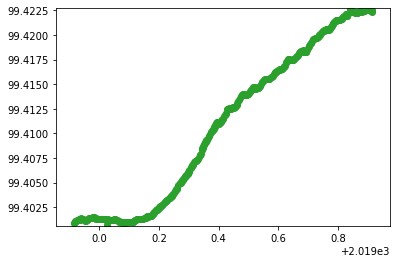

7102.212958891141
37081


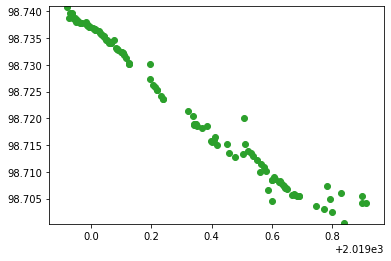

7381.524460424601
42956


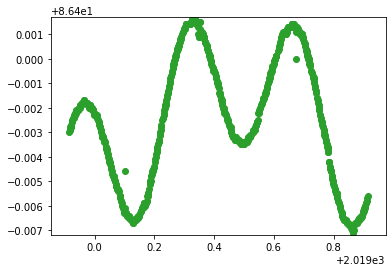

7155.833022837108
21548


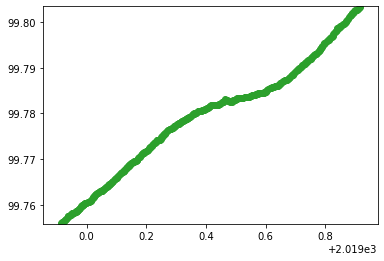

7659.061398786304
41415


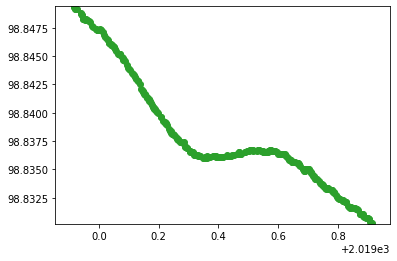

7221.714376827973
43254


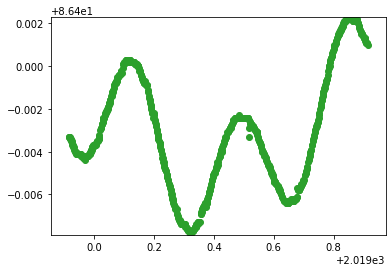

7155.813564269671
31329


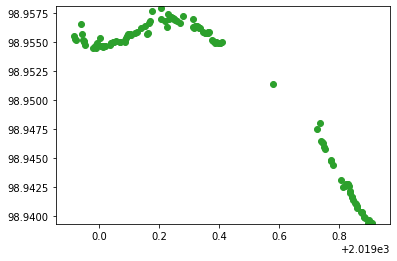

7134.107751440507
22357


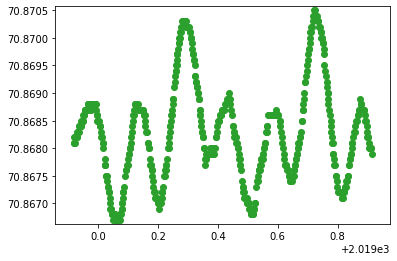

7014.564402501426
36615


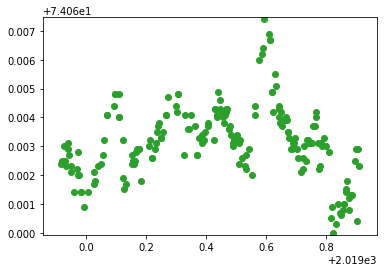

7146.774920092176
44608


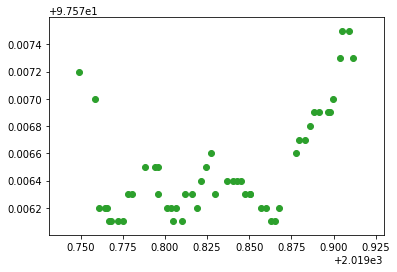

6923.39913753409
36528


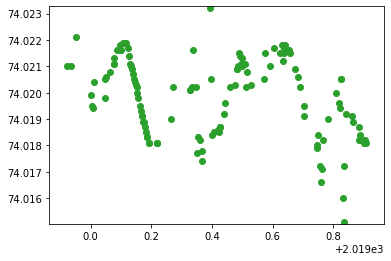

7197.662071456237
39098


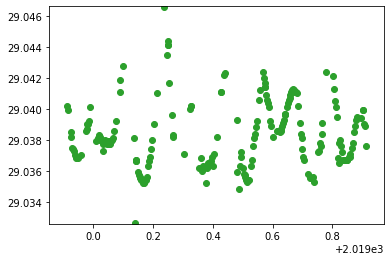

7324.788916927459
19250


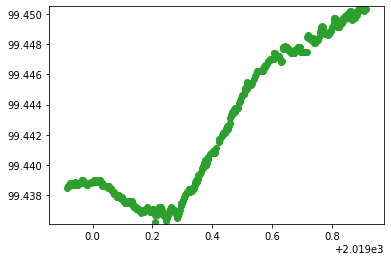

7390.314557142102
42803


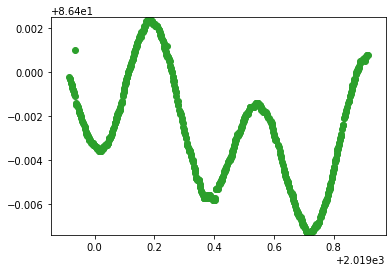

7155.905652692619
23431


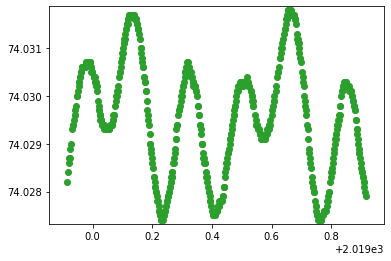

7168.839634099351
35578


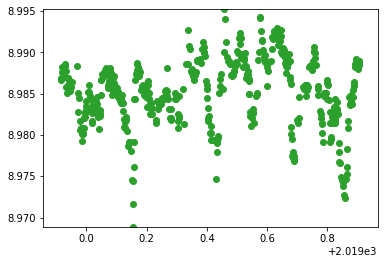

7049.185792236539
16194


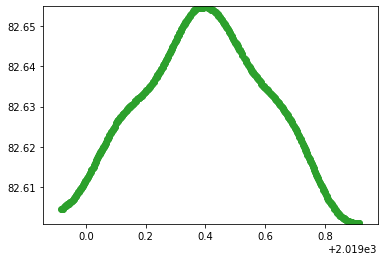

7613.653438919132
22348


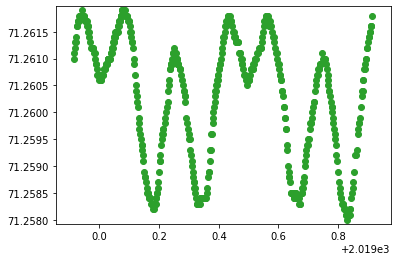

7250.872869351648
21168


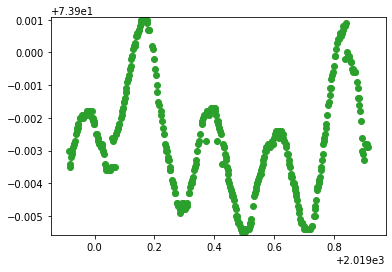

7937.404522688237
30625


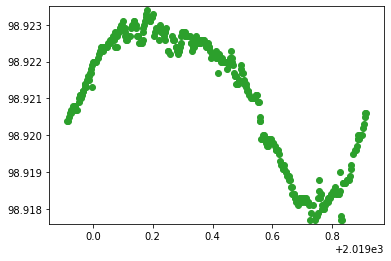

7247.6857478455695
44060


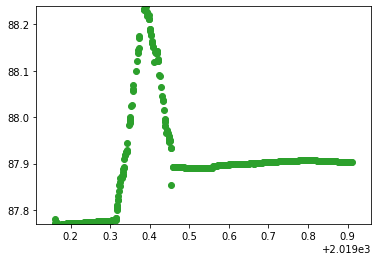

7582.6145480534915
35643


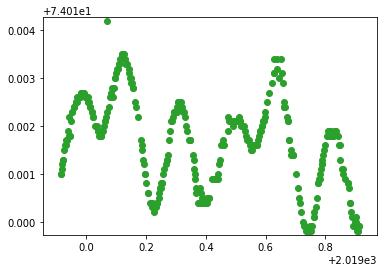

7072.496679416366
8027


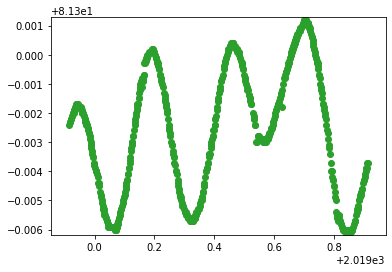

7246.673894557523
26721


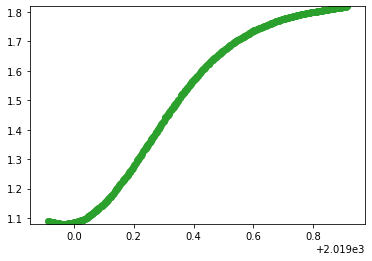

24632.741451004378
14820


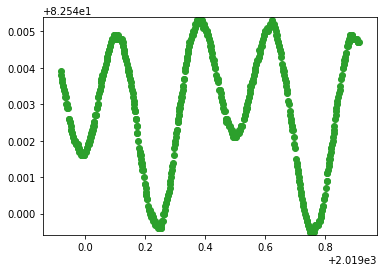

6996.070548100088
38681


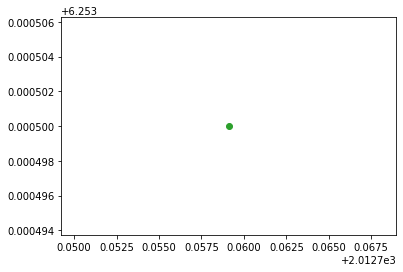

30330.47344767598
41030


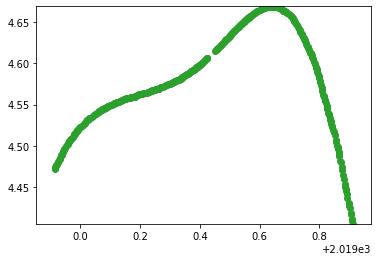

24013.642070491085
31360


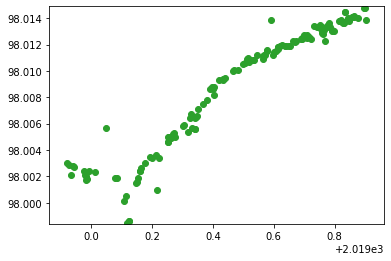

7295.704027870278
39741


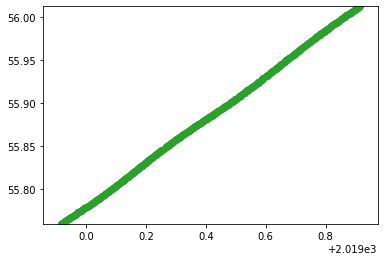

26561.64781575217
23347


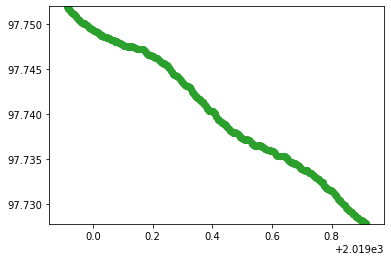

7101.25319455821
13269


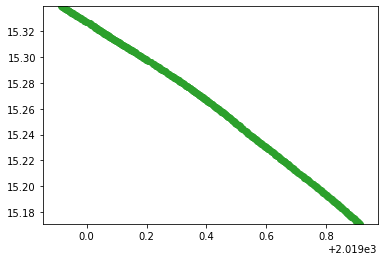

42464.52676673043
41849


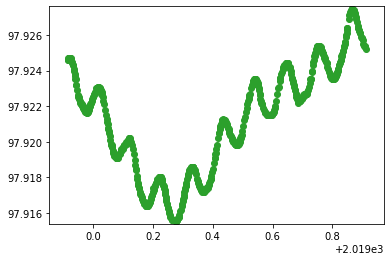

6951.173251888212
2530


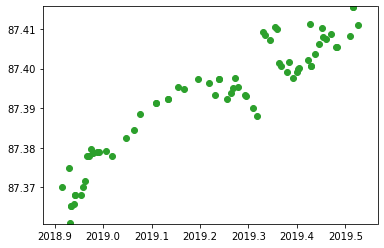

9994.49833236235
33460


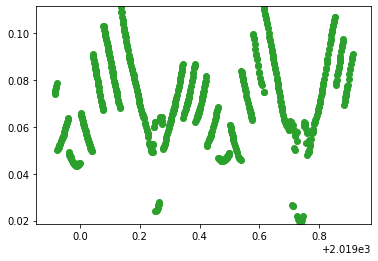

42166.09220777379
42028


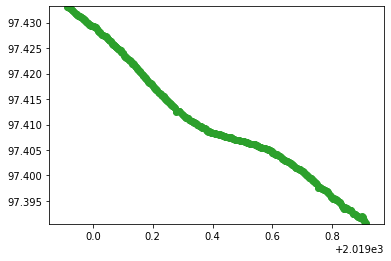

6869.331353497549
36831


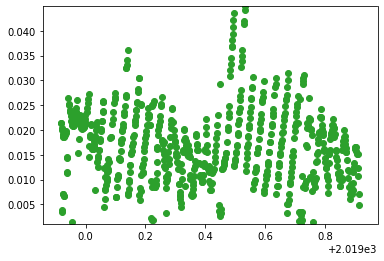

42165.91614329667
7065


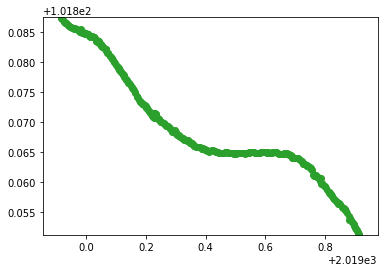

7913.859256180175
33056


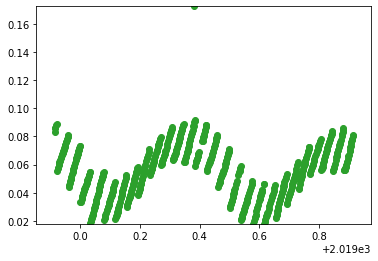

42166.98713715928
2778


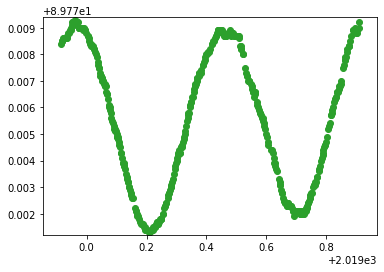

7509.715025780058
35487


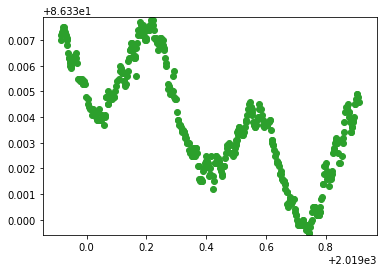

7084.079771635205
30264


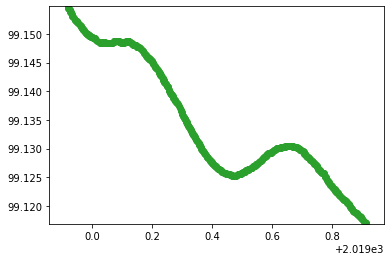

7271.851343715958
36987


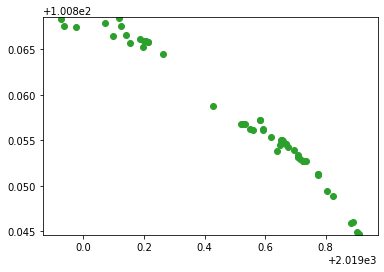

7474.119212418516
34667


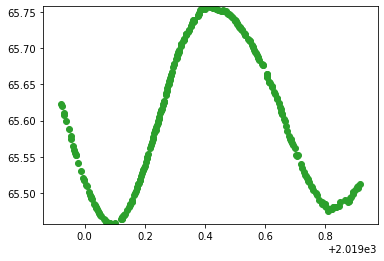

15859.988334115227
39455


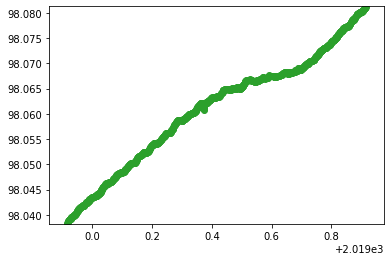

7123.912684682334
29810


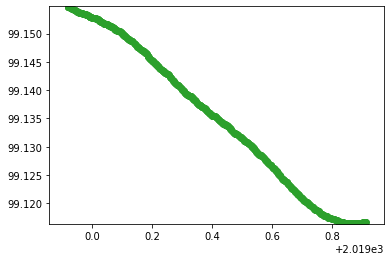

7185.169204346596
21366


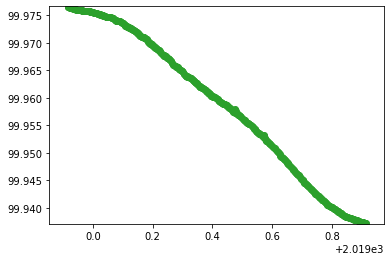

7477.138600663032
34390


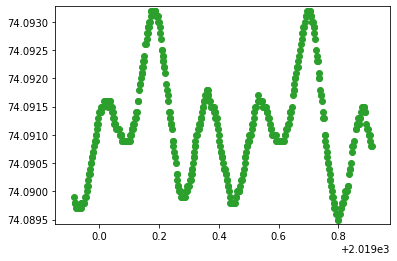

7083.7608395094585
42791


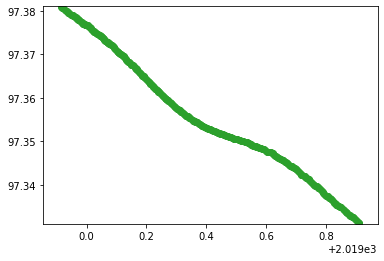

6876.927709984201
7148


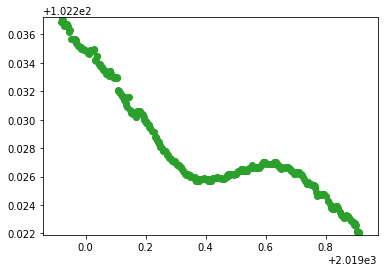

7946.089333308646
15625


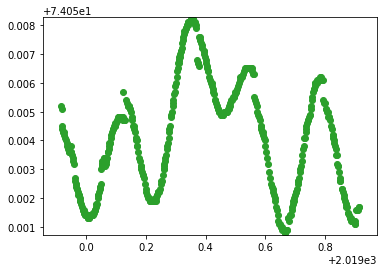

7971.160091297753
20150


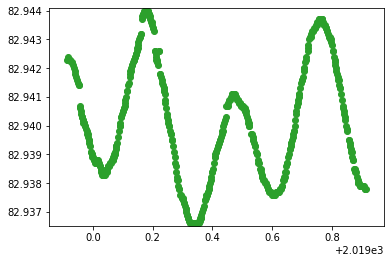

7357.585899947406
26622


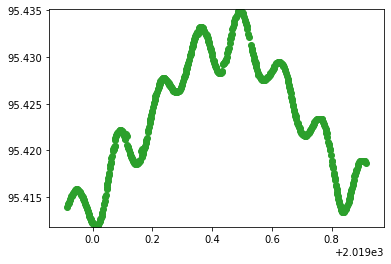

7622.992634267539
17125


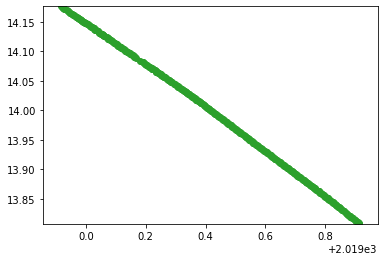

42186.31146915346
43784


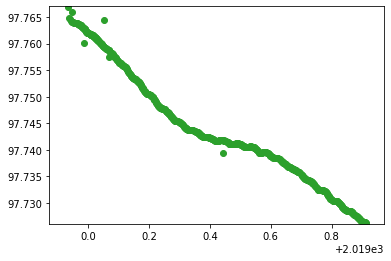

6960.804187672418
28055


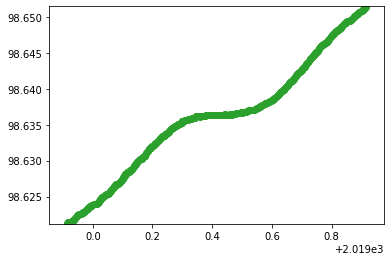

7197.006822806233
34028


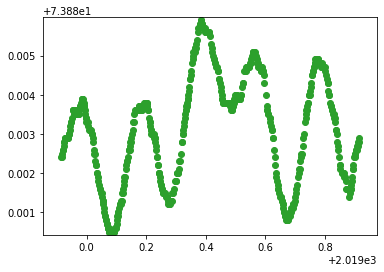

7568.35856399362
29106


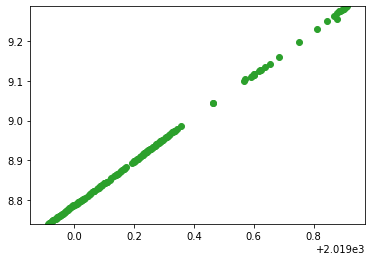

41919.20794334977
42001


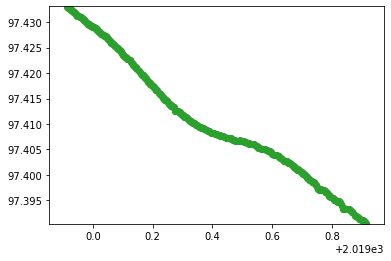

6869.261747948523
17536


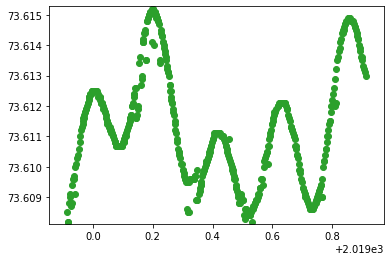

7877.894018904399
35925


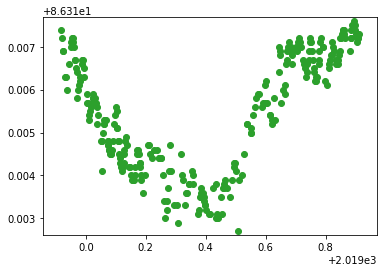

7015.391862747179
29896


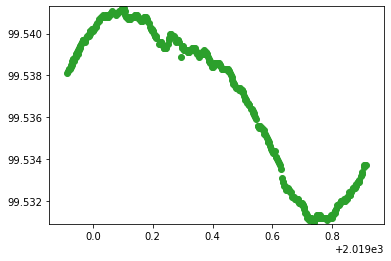

7403.478540318399
6216


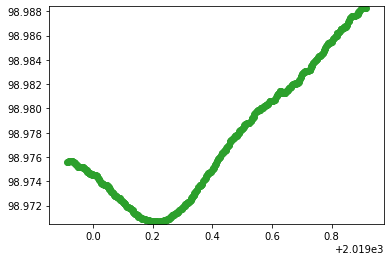

7169.402688119825
2608


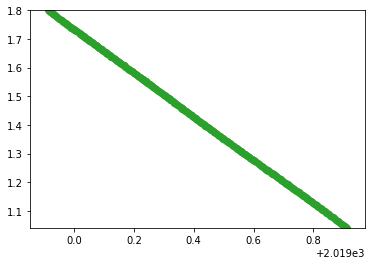

42157.53249953113
36331


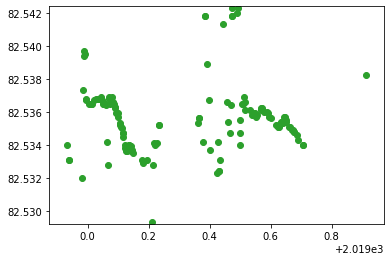

7235.618834333729
12674


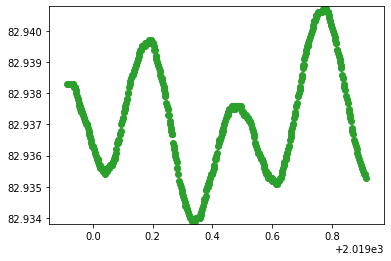

7371.162270991431
28421


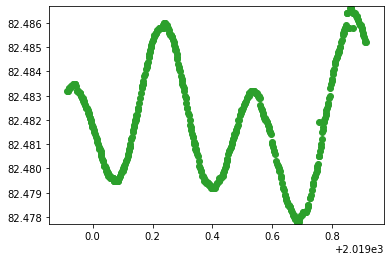

7866.296552721579
34259


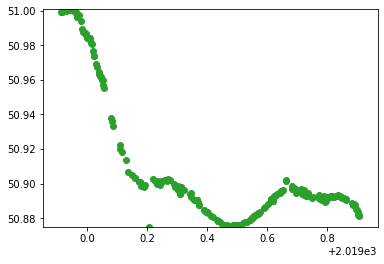

14299.893022620976
36206


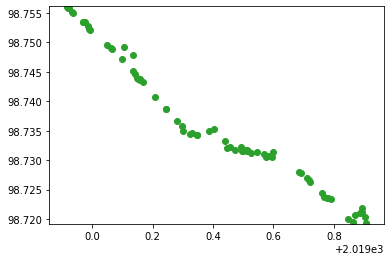

7217.12793798157
37927


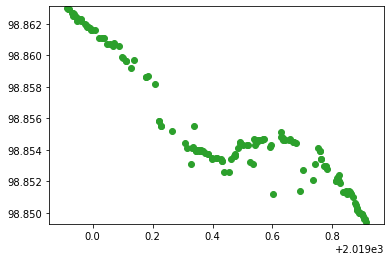

7186.076204011608
40033


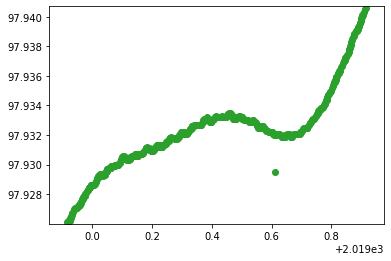

6973.9191698141
42518


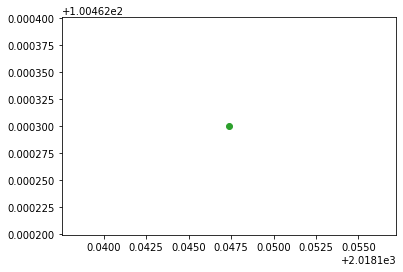

7375.338893148503


In [285]:
for x in range(100):
    dfinter = list(set(dfprop.NORAD_CAT_ID.astype(str).unique()).intersection(set(df.norad.unique())))
    x = random.randint(0,len(dfinter) - 1)
    el = str(dfinter[x]) #29517 ## 35903, 35904, 35946!!!, 24812 #### decay 43757, 43295 # test 39764 # difficult 43195 
    #el = str(35230)
    # 43111 chaotic # unclear 40015
    # inc of 35250 interesting, 42122, 44240
    #el = str(list(df.norad.unique())[2])
    print(str(el))
    dfsub = df[df.norad == el]
    list1 = dfsub.epoch_year
    #if len(list1) > 100:
    date = list1 + dfsub.epoch_day / 366
    #plt.scatter(date, dfsub.ecc)
    apo = apogeecal(dfsub.n, dfsub.ecc)
    per = perigeecal(dfsub.n, dfsub.ecc)
    plt.scatter(date, apo)
    plt.scatter(date, per)
    plt.scatter(date, dfsub.inc)
    #plt.ylim(-0.001, 0.001)
    #plt.ylim(0.425,0.43)
    #plt.ylim(apo.min()*(1-0.000001), apo.max()*(1+0.000001))
    #plt.xlim(2019.4,2019.6)
    #plt.ylim(per.min()*(1-0.000001), per.max()*(1+0.000001))
    plt.ylim(dfsub.inc.min()*(1-0.000001), dfsub.inc.max()*(1+0.000001))
    plt.show()
    print(apo.max())
    time.sleep(1)

12644


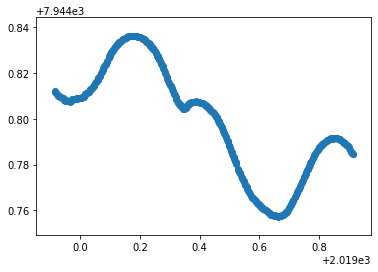

7944.836467288731
36732


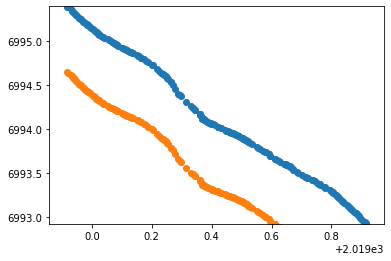

6995.3859491799285
10461


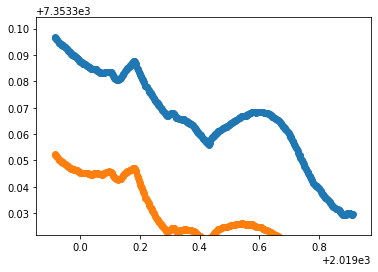

7353.396922368854
13765


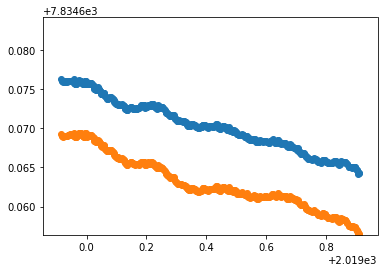

7834.676356704441
28367


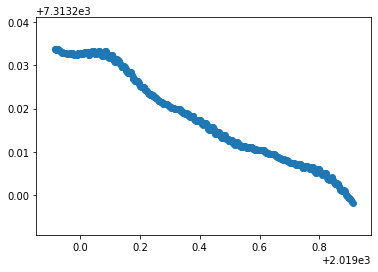

7313.233723405891
44679


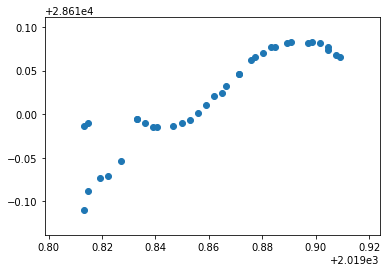

28610.082385469726
30275


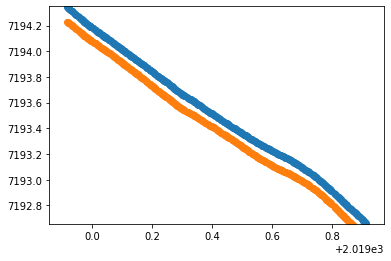

7194.342336554242
5398


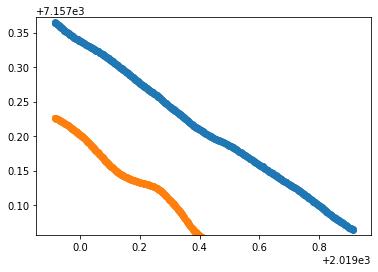

7157.365006791425
3670


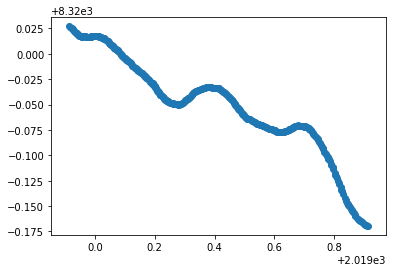

8320.027561270937
23827


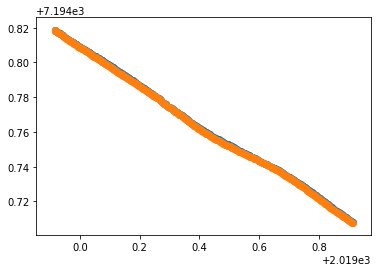

7194.818772880054
133


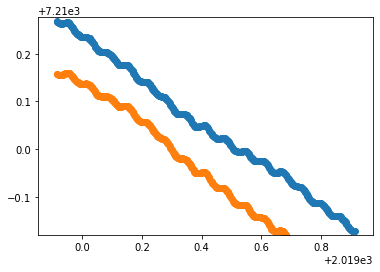

7210.269072436513
38435


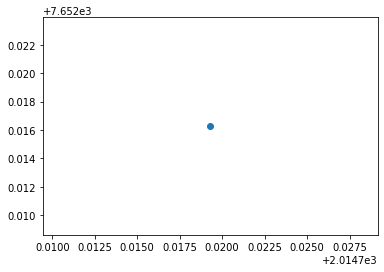

7652.016279239598
30147


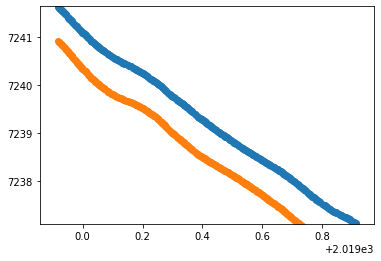

7241.626805073228
31564


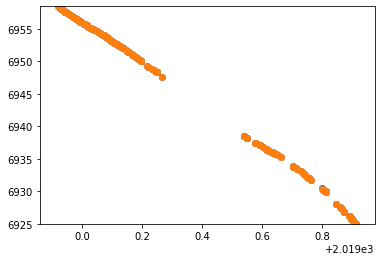

6958.47932648268
14913


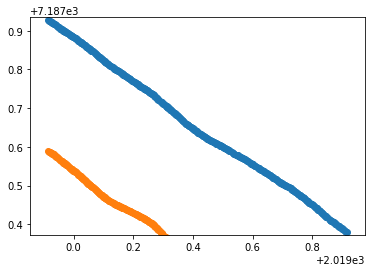

7187.92741680962
16961


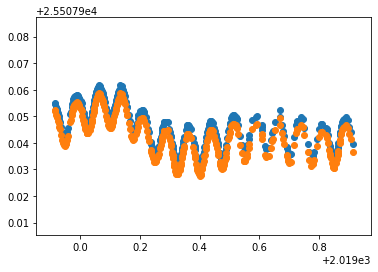

25507.961705624708
3158


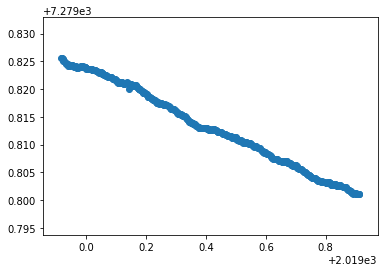

7279.825636051884
25810


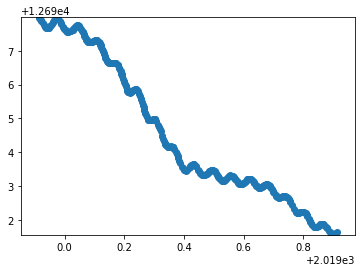

12697.969797216734
2144


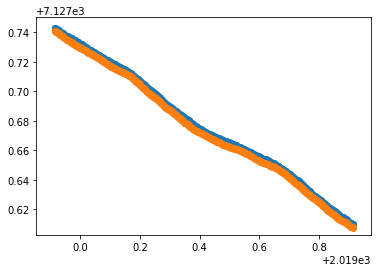

7127.743065946653
40086


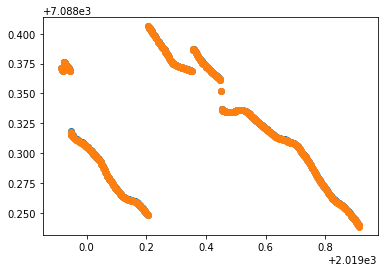

7088.406694365901
36216


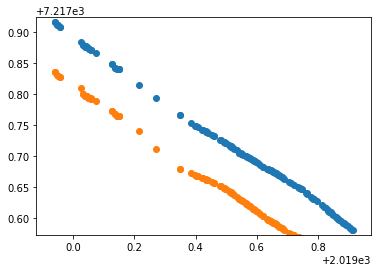

7217.916998834663
43986


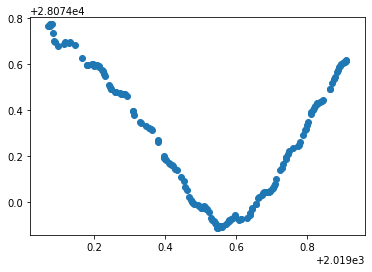

28074.774470119293
30542


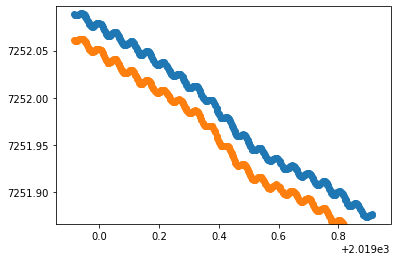

7252.089493383368
4913


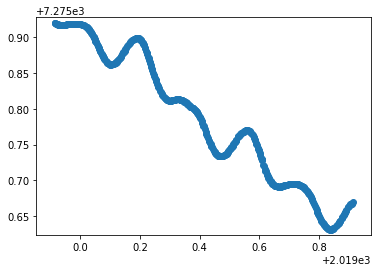

7275.920751191048
38367


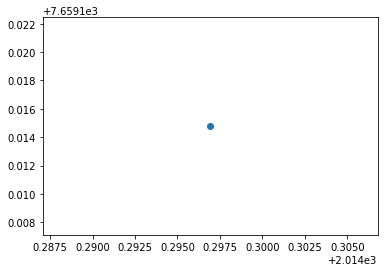

7659.11478528636
29811


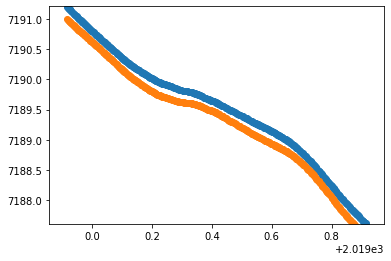

7191.1992963166895
26441


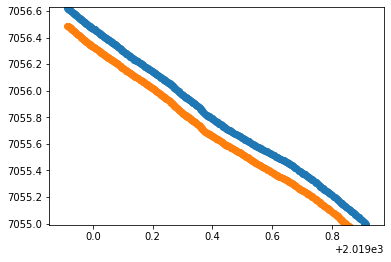

7056.620287917026
26181


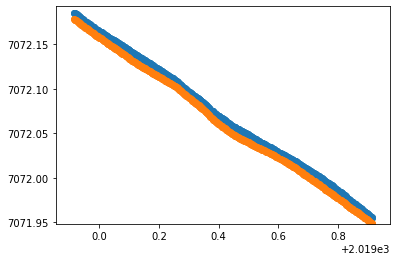

7072.185431643431
43591


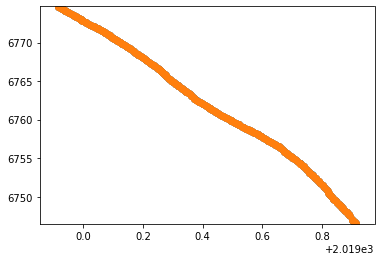

6774.682688122182
20557


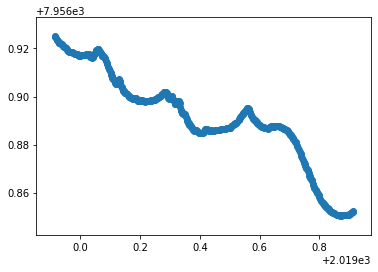

7956.924995763308
36864


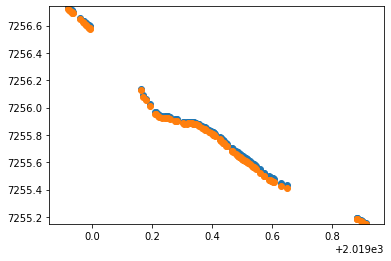

7256.732794185519
35408


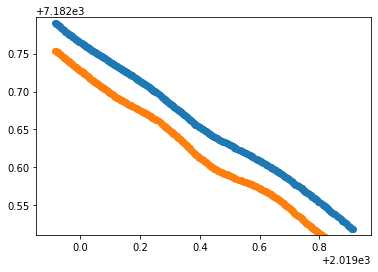

7182.7906721209065
37926


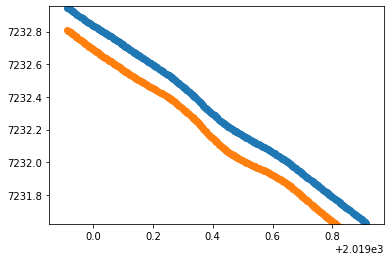

7232.947288787717
27576


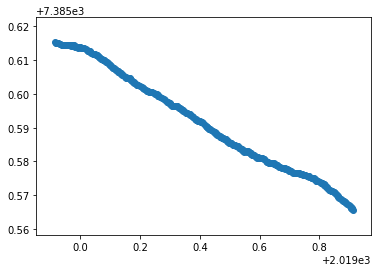

7385.615308381687
4709


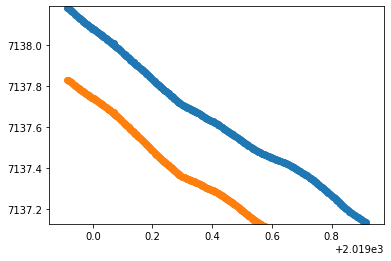

7138.181567104575
31858


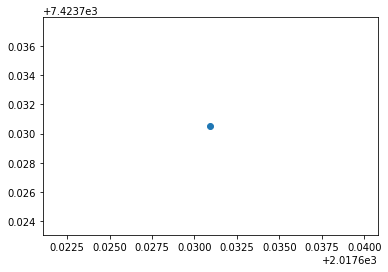

7423.730511484408
38569


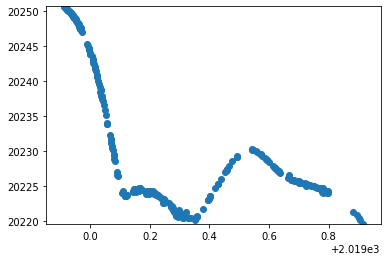

20250.683438987846
9987


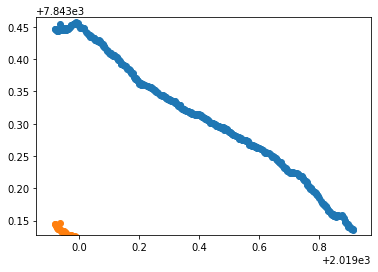

7843.456876794362
31356


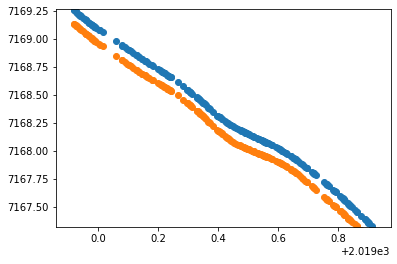

7169.254749247702
30072


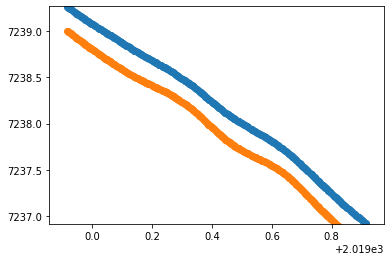

7239.258394897136
7364


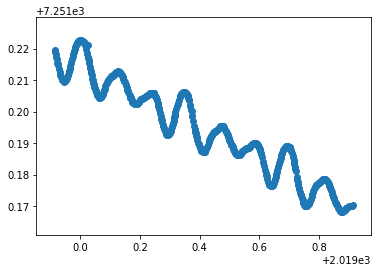

7251.2226290314975
39316


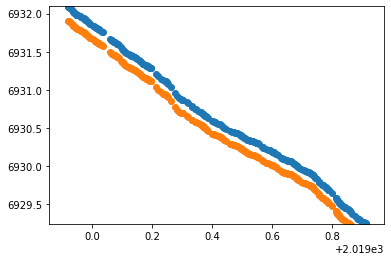

6932.088716945126
35093


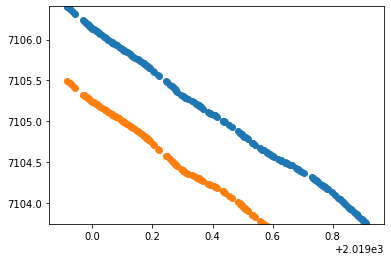

7106.3988931962995
268


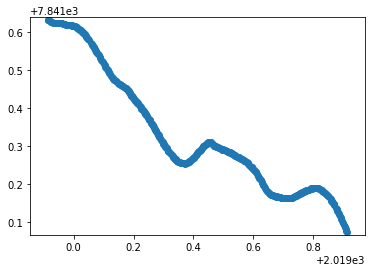

7841.630607150301
38625


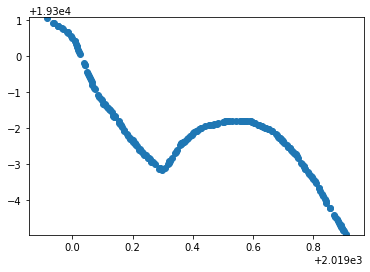

19301.053989207925
34262


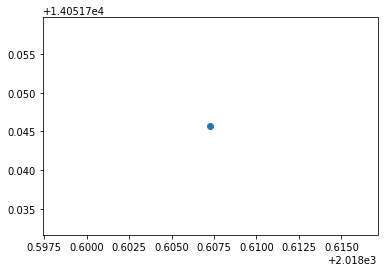

14051.745689100067
37788


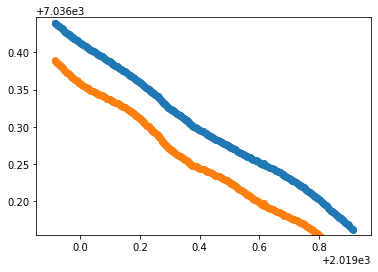

7036.439785876712
35159


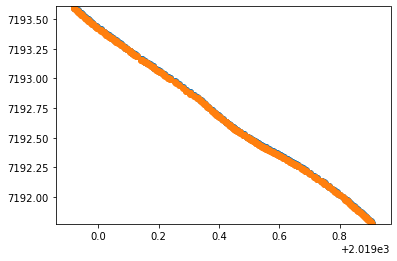

7193.60091101706
13764


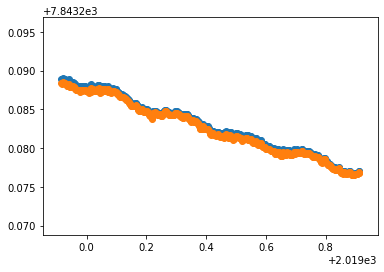

7843.289021558335
21976


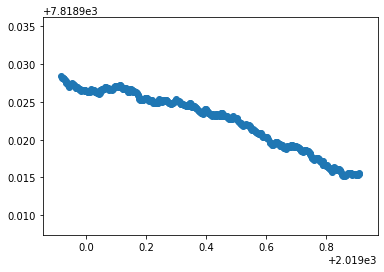

7818.928372902674
13608


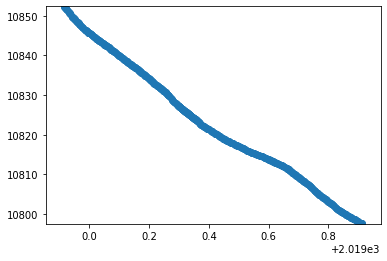

10852.376816449709
37908


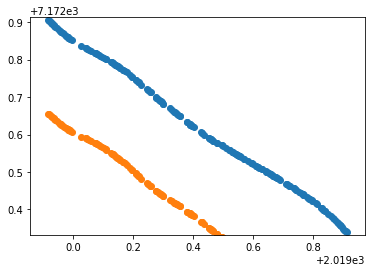

7172.9057345569
12185


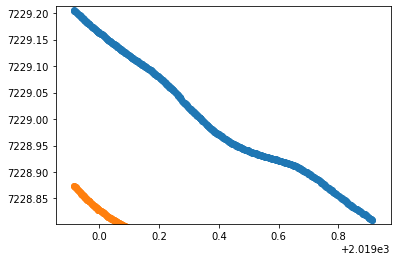

7229.205603942818
19026


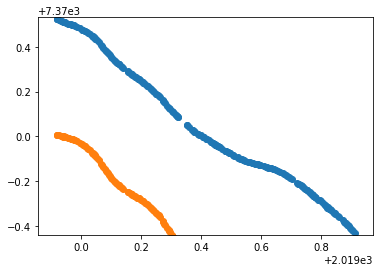

7370.523256458537
23620


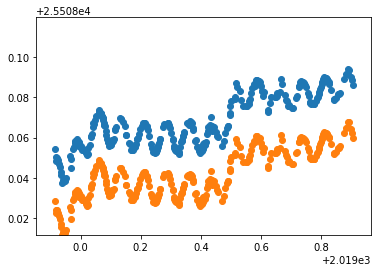

25508.09393279144
44231


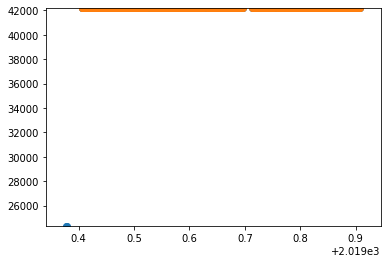

42165.7168113697
7031


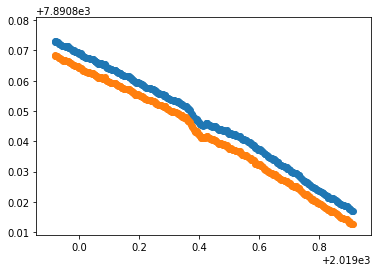

7890.873025012601
37278


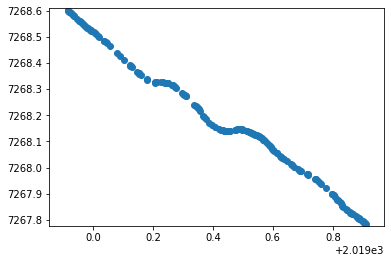

7268.603048227326
11049


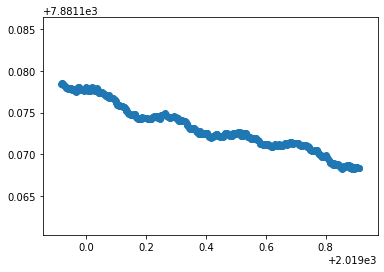

7881.178517848178
25993


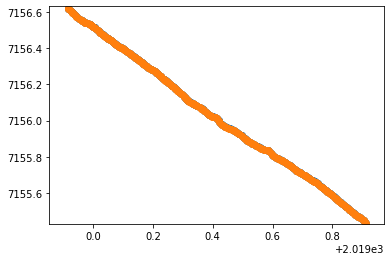

7156.623744639783
19020


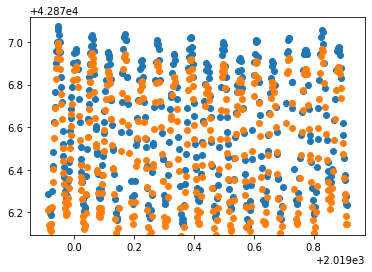

42877.07262556342
32449


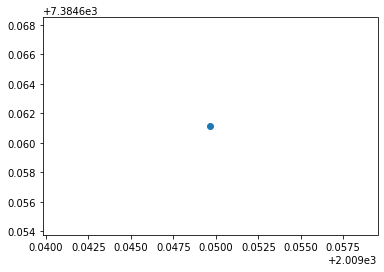

7384.6611356128315
30138


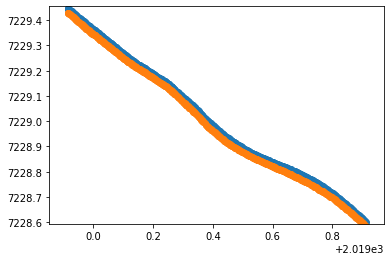

7229.447268311578
7893


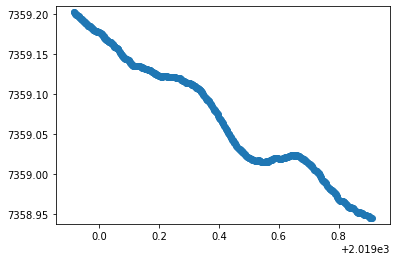

7359.2024135513575
14802


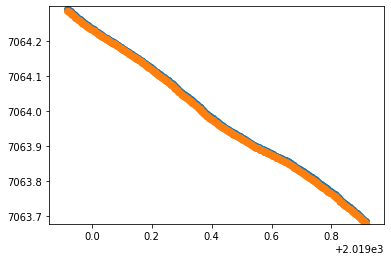

7064.292318609637
20025


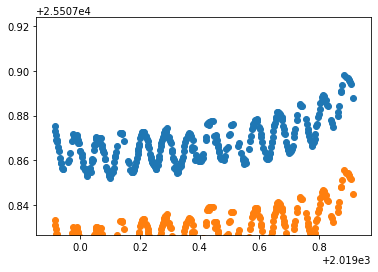

25507.89826592066
41954


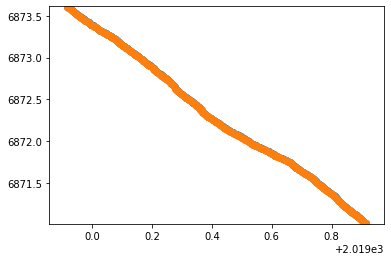

6873.60696037151
39935


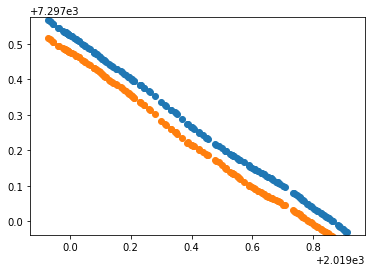

7297.567467955143
40274


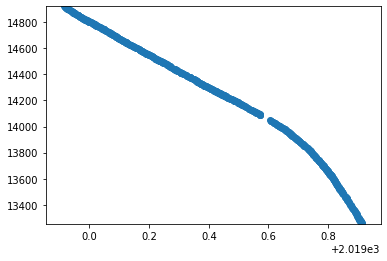

14921.281834431742
12987


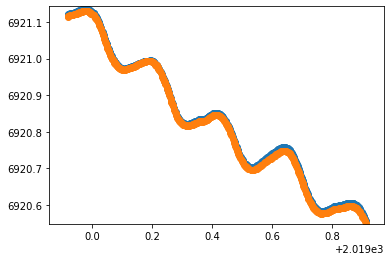

6921.135931355163
27226


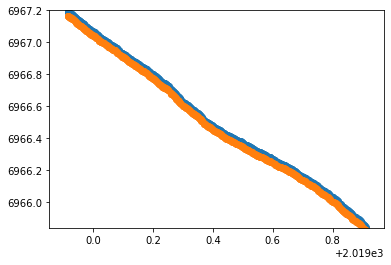

6967.19326690407
24299


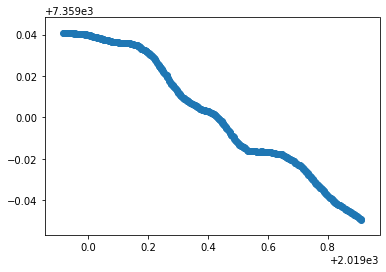

7359.040960184758
9983


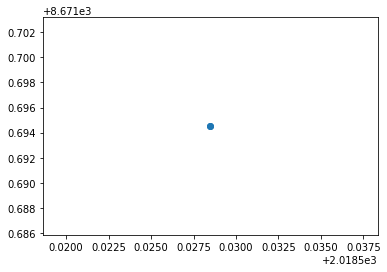

8671.694522355936
44727


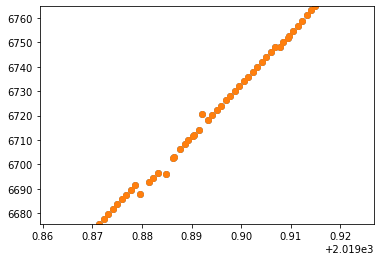

6764.807680558422
14910


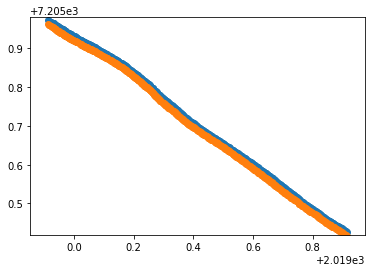

7205.973048834927
31862


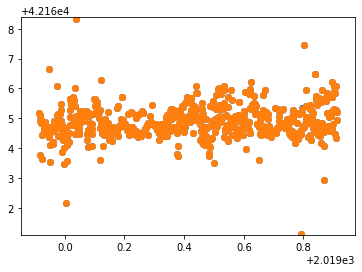

42168.33775176448
28158


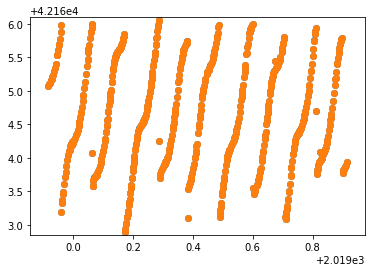

42166.053518288456
23739


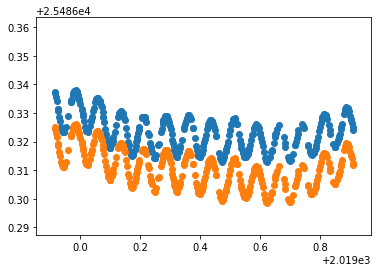

25486.33791046498
36132


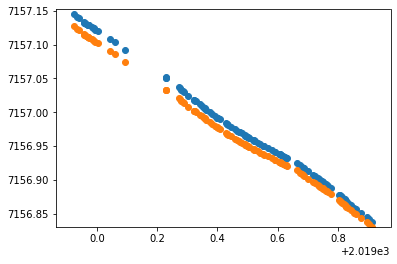

7157.144978373925
35483


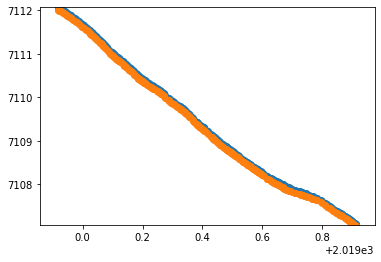

7112.059432426917
2608


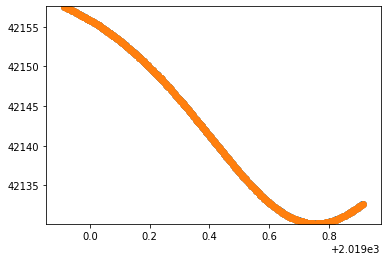

42157.53249953113
6850


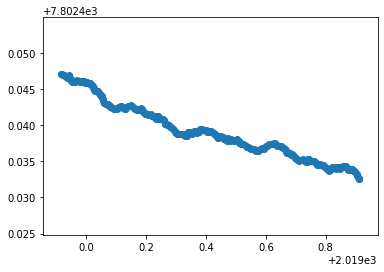

7802.447170295613
39105


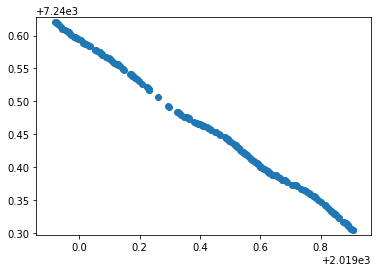

7240.620428974426
13476


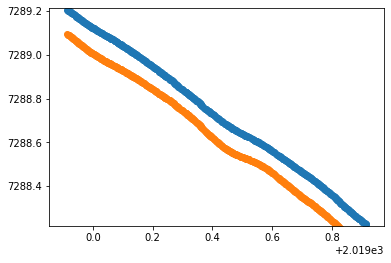

7289.204828253191
42047


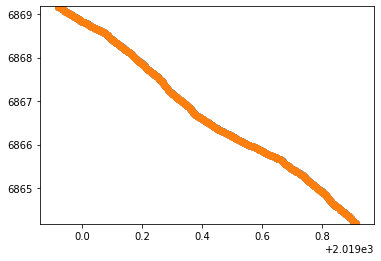

6869.171251658781
26009


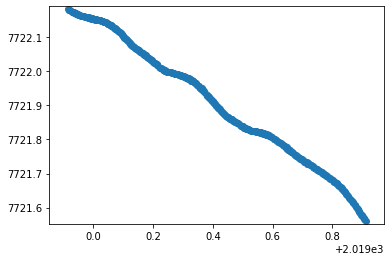

7722.182812344022
14799


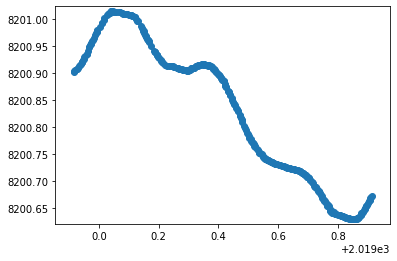

8201.015666077923
8405


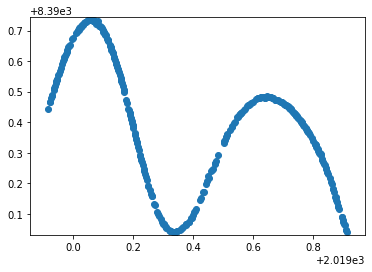

8390.734725939492
43831


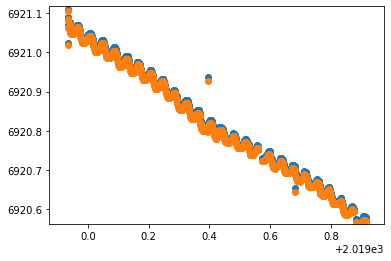

6921.110550195191
31471


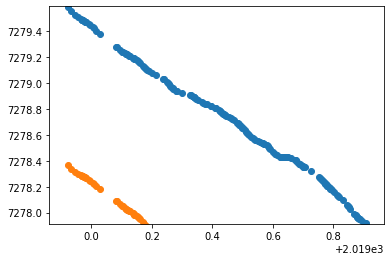

7279.585621135282
38503


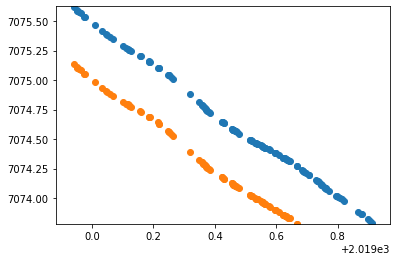

7075.6166815357
25839


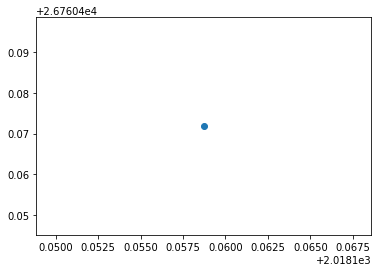

26760.471837139397
30209


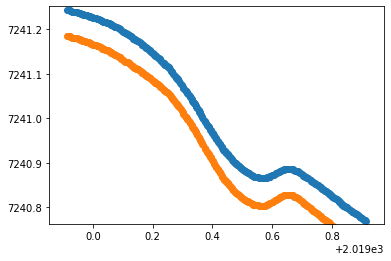

7241.244197466059
39207


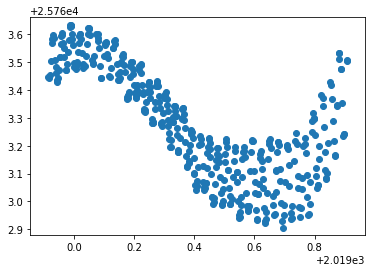

25763.63445248231
38224


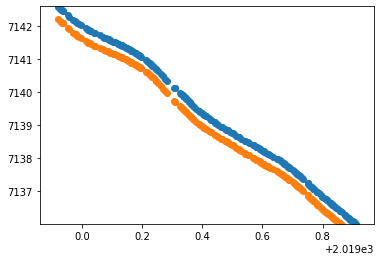

7142.582718722073
32226


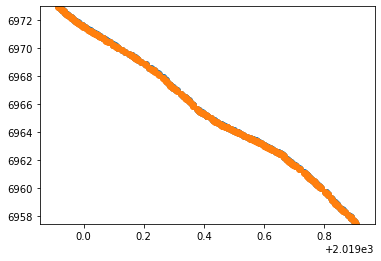

6972.950496302256
40707


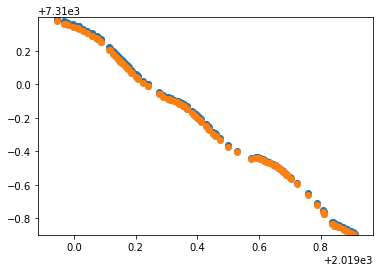

7310.391635627524
38150


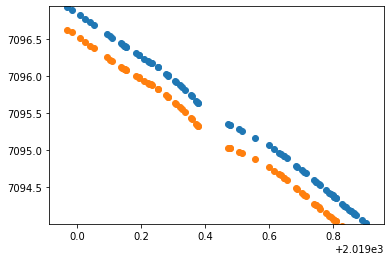

7096.940551559601
42609


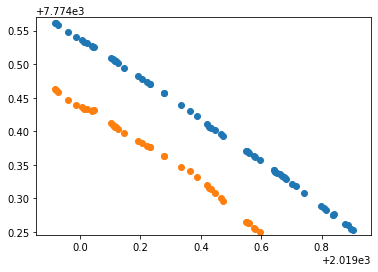

7774.56190855168
39122


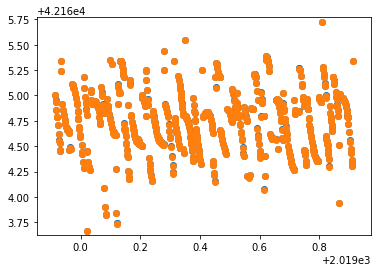

42165.727745127406


In [286]:
for x in range(100):
    dfinter = list(set(dfprop.NORAD_CAT_ID.astype(str).unique()).intersection(set(df.norad.unique())))
    x = random.randint(0,len(dfinter) - 1)
    el = str(dfinter[x]) #29517 ## 35903, 35904, 35946!!!, 24812 #### decay 43757, 43295 # test 39764 # difficult 43195 
    #el = str(35230)
    # 43111 chaotic # unclear 40015
    # inc of 35250 interesting, 42122, 44240
    #el = str(list(df.norad.unique())[2])
    print(str(el))
    dfsub = df[df.norad == el]
    list1 = dfsub.epoch_year
    #if len(list1) > 100:
    date = list1 + dfsub.epoch_day / 366
    #plt.scatter(date, dfsub.ecc)
    apo = apogeecal(dfsub.n, dfsub.ecc)
    per = perigeecal(dfsub.n, dfsub.ecc)
    plt.scatter(date, apo)
    plt.scatter(date, per)
    #plt.scatter(date, dfsub.inc)
    #plt.ylim(-0.001, 0.001)
    #plt.ylim(0.425,0.43)
    plt.ylim(apo.min()*(1-0.000001), apo.max()*(1+0.000001))
    #plt.xlim(2019.4,2019.6)
    #plt.ylim(per.min()*(1-0.000001), per.max()*(1+0.000001))
    #plt.ylim(dfsub.inc.min()*(1-0.000001), dfsub.inc.max()*(1+0.000001))
    plt.show()
    print(apo.max())
    time.sleep(1)

33644


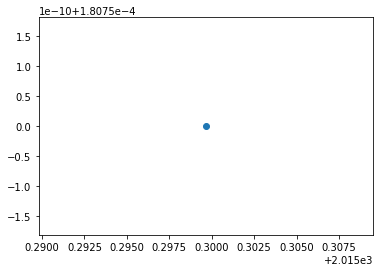

6963.766861362262
44637


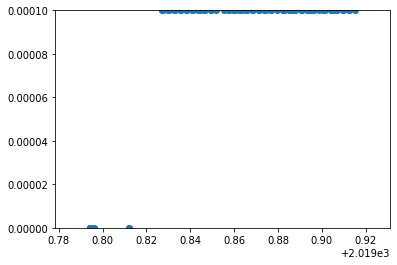

42165.649246511304
38567


/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


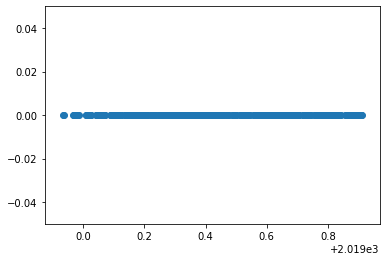

20553.549806216433
39801


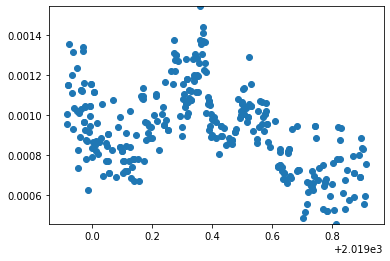

15662.985879955782
38948


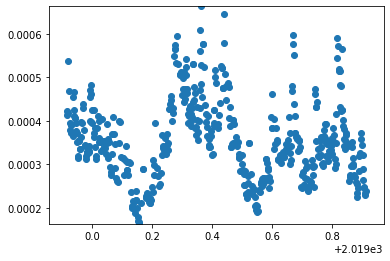

8013.823475489621
28822


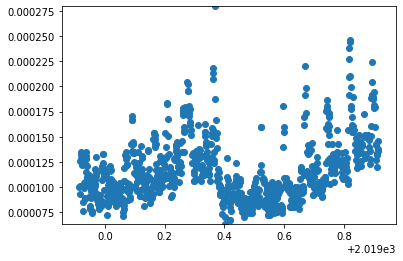

6750.269108590166
30135


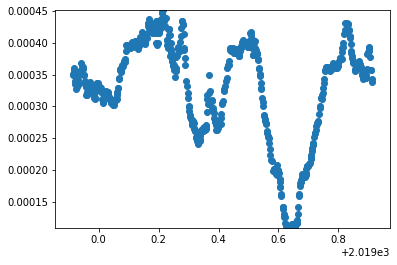

7153.081305377553
28884


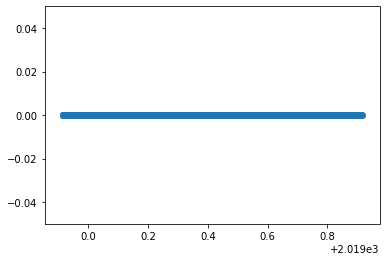

42166.041462887246
41783


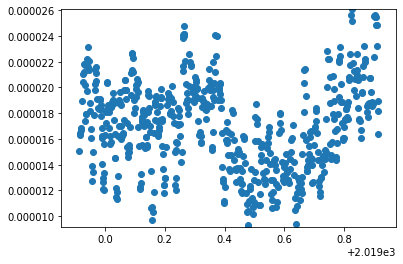

7061.77505819973
24726


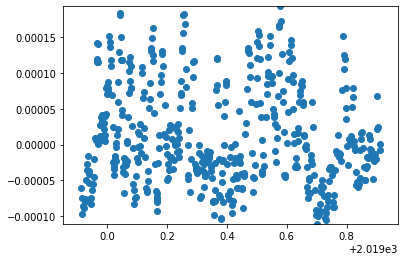

7795.56001679167
15616


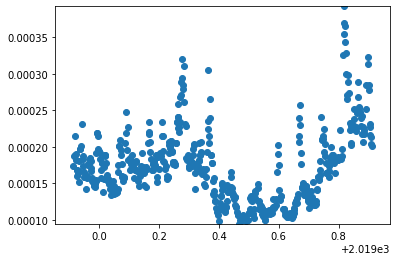

6906.360650947583
44565


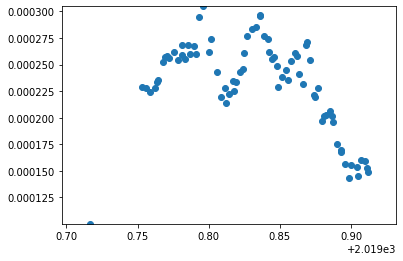

7375.894487606837
33156


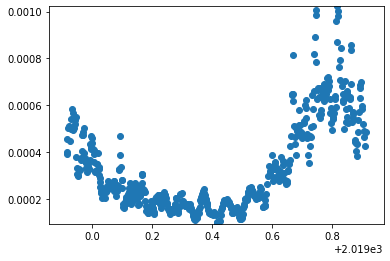

23607.85519053246
26310


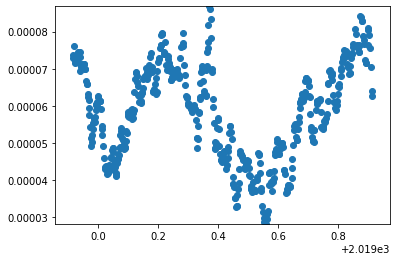

7132.1292725458425
9702


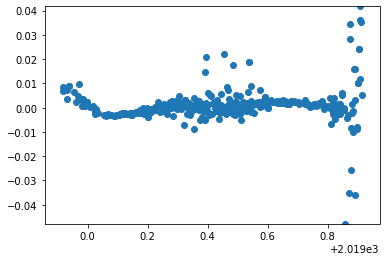

8343.335087269852
39535


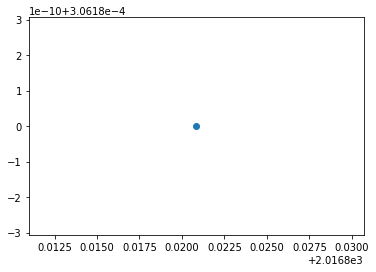

7270.075976810467
3488


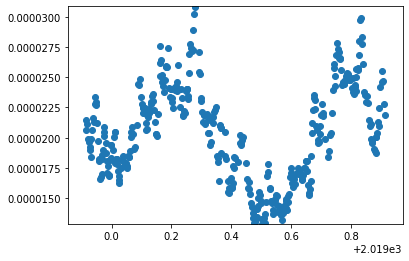

7037.803044671366
19928


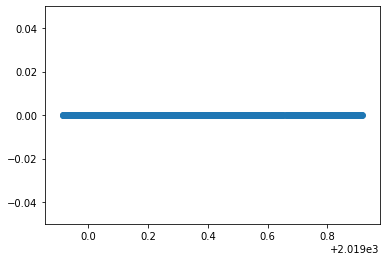

42190.51371762053
43291


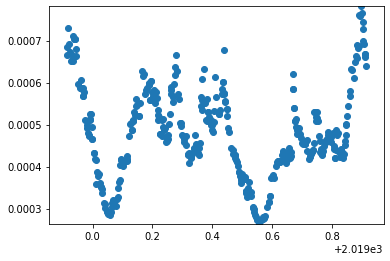

7056.195080689224
19594


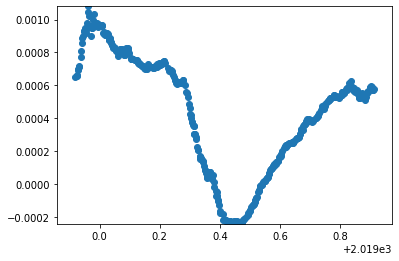

7225.203123633015
39446


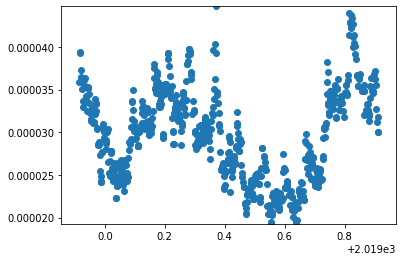

7012.85458322135
43421


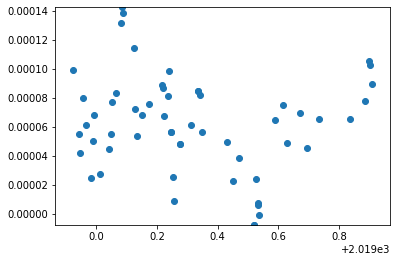

7472.581795235291
4254


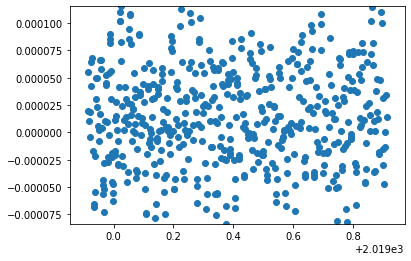

7535.783328874955
30013


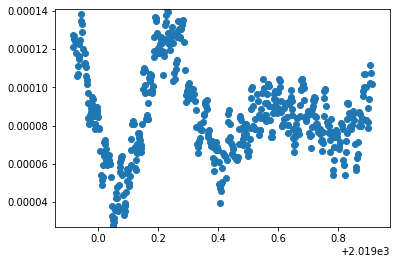

7320.396488971126
35038


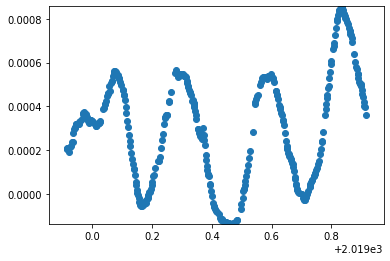

7237.799100251598
721


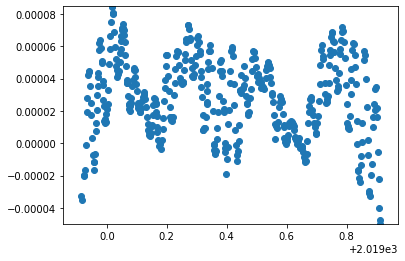

7827.373503997905
26024


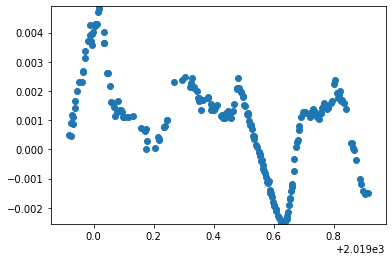

7912.932041503982
41375


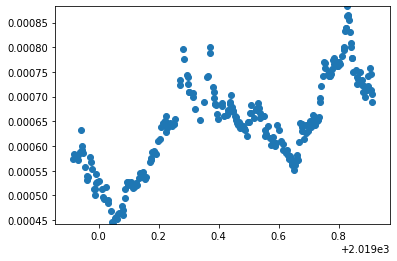

7211.599647202042
39465


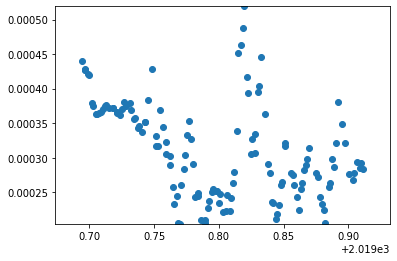

7027.5518074673355
15769


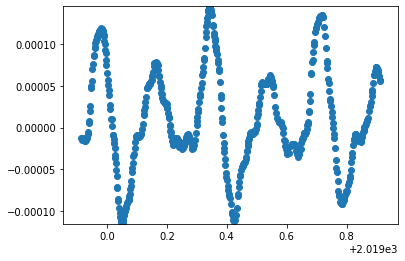

7248.213802424563
37345


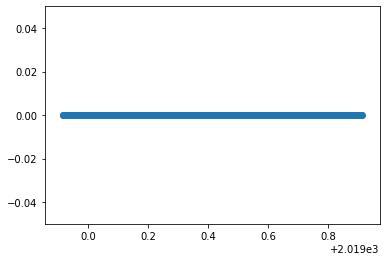

41471.27110738938
4772


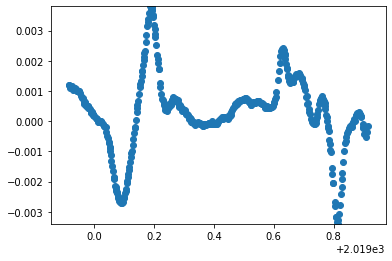

7546.6023179803215
4855


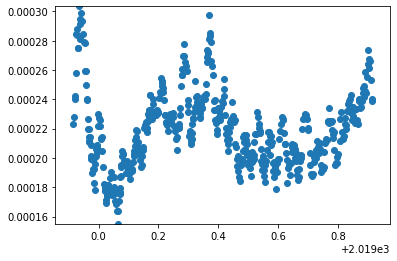

7372.6842789982975
33826


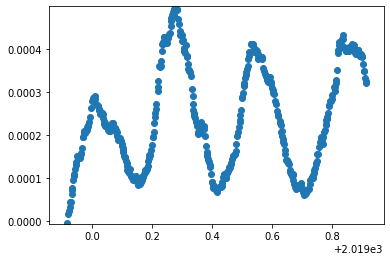

7173.561260892593
10642


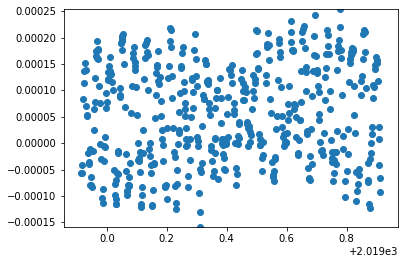

7963.267518016475
22366


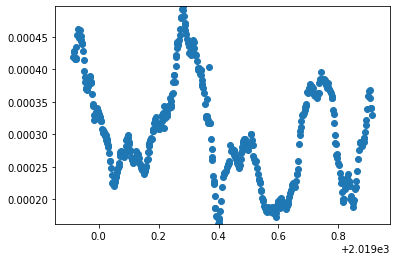

7185.134329724521
26470


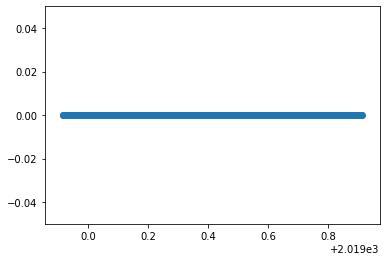

42802.18793873285
43682


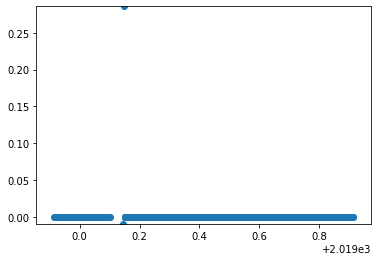

6937.396128391116
30973


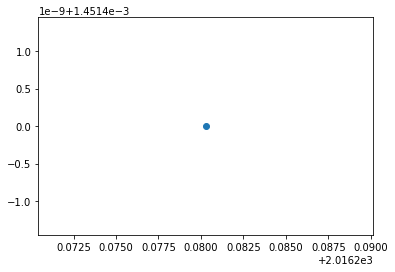

7235.07415600172
43647


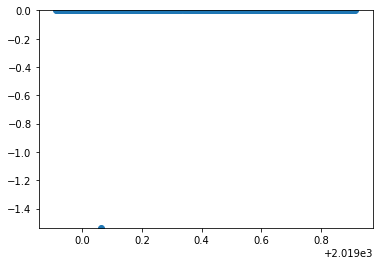

27906.052103894828
31784


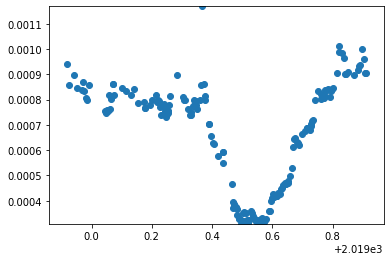

7150.742909680808
32265


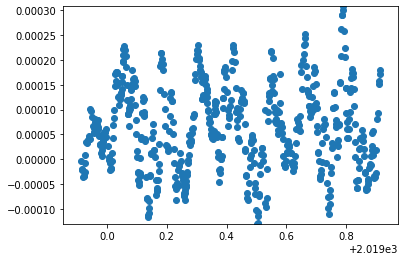

7795.105709179149
28584


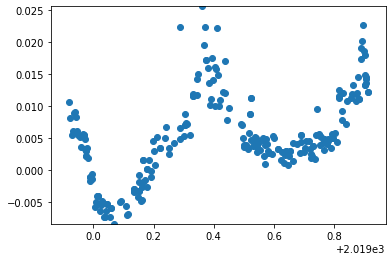

12512.582071596446
35944


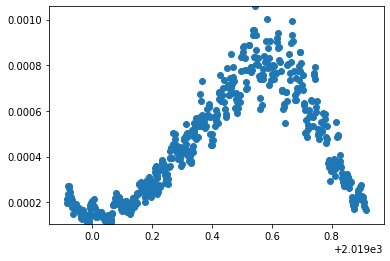

22841.747621149774
23105


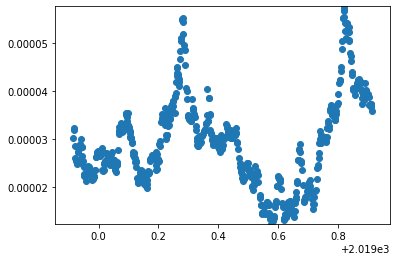

7021.046212474923
5435


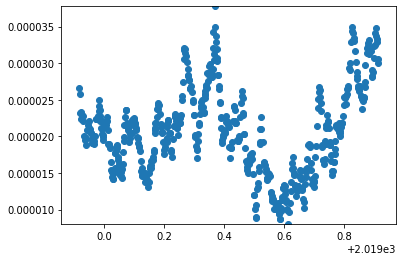

7087.0225288321735
162


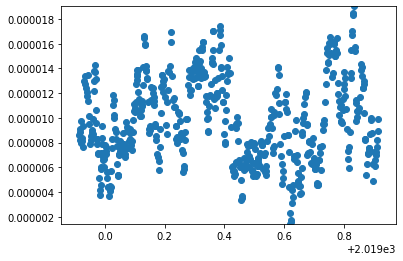

7123.390379803276
18728


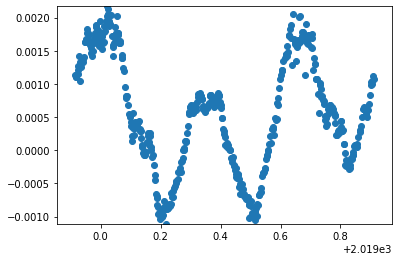

7903.465295535826
35110


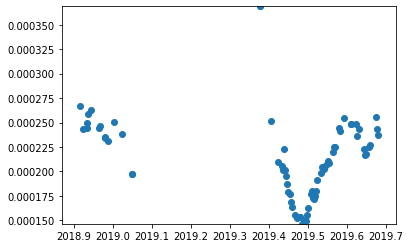

7128.019217831068
42870


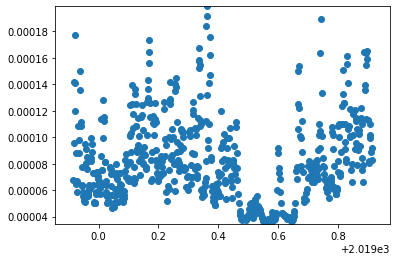

6830.624603317291
44205


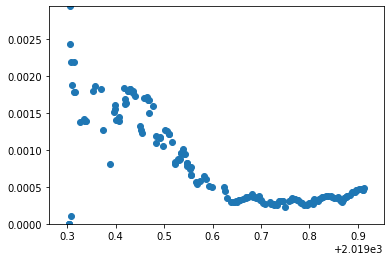

23653.25463575569
39642


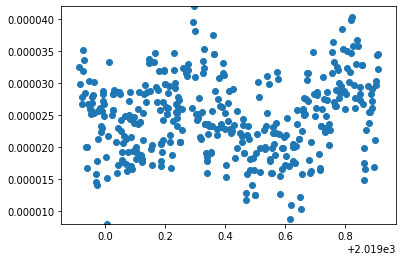

7165.285788713065
37347


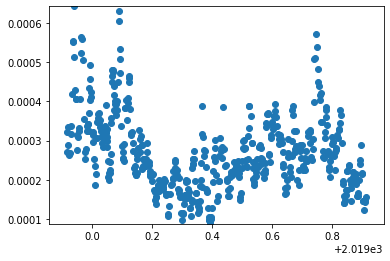

8207.495924906969
20473


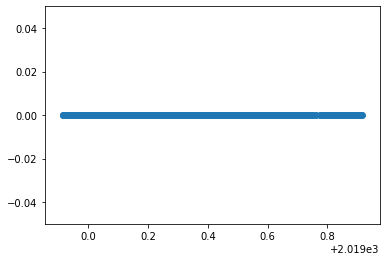

42166.07454517165
6216


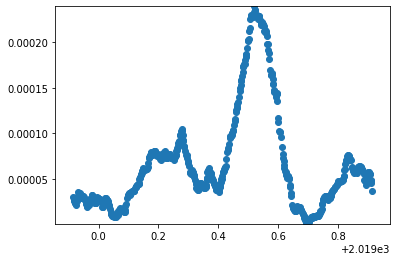

7169.402688119825
35455


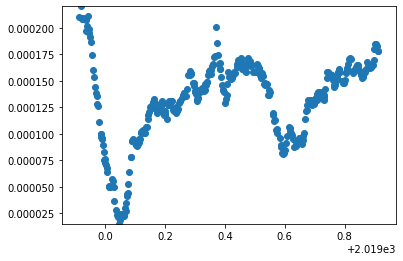

7156.881825748439
3506


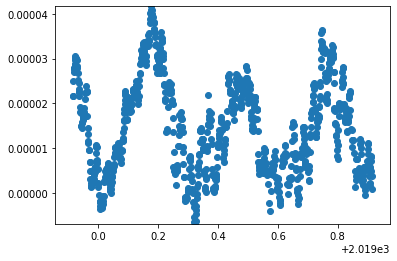

7682.054671170148
44721


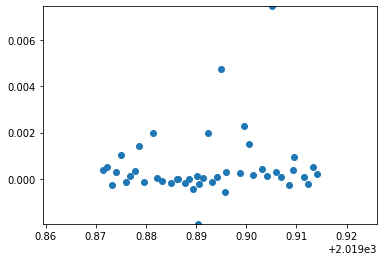

6728.468306063092
41058


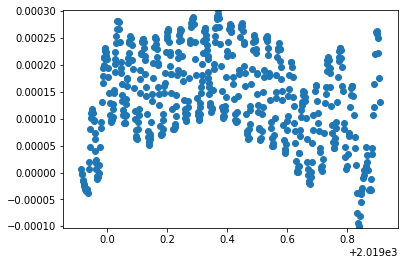

7246.474889716541
28238


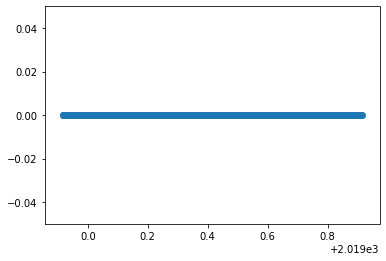

42165.82390643003
38603


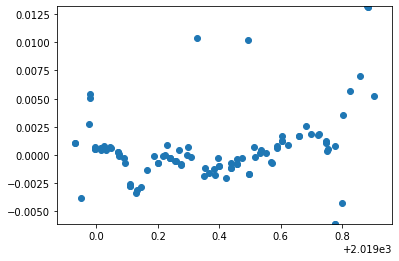

19619.743951885834
14612


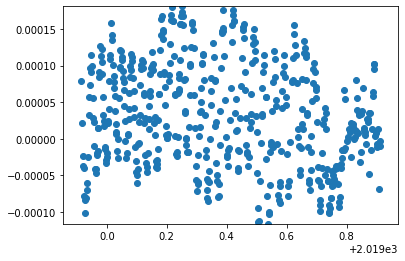

7806.835748869792
42345


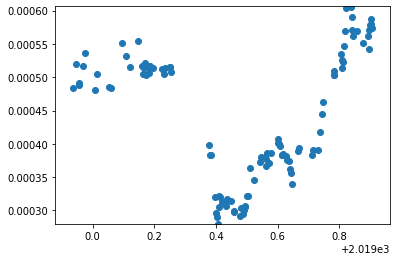

7193.15652075066
41331


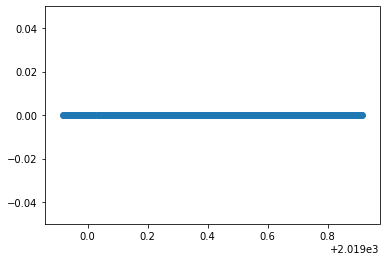

25808.834088170344
29668


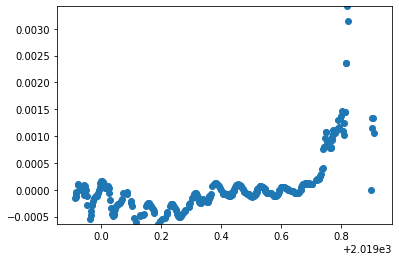

26562.144053699423
37532


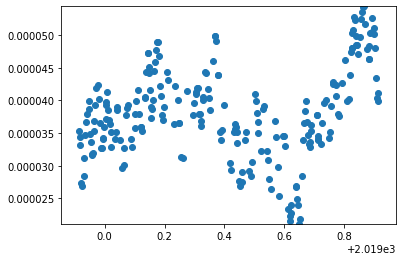

7140.892065068934
44316


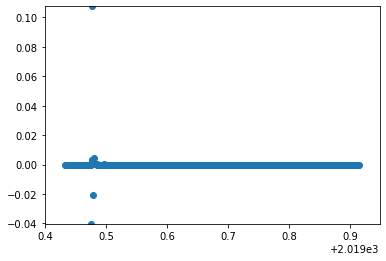

6948.816812016491
35667


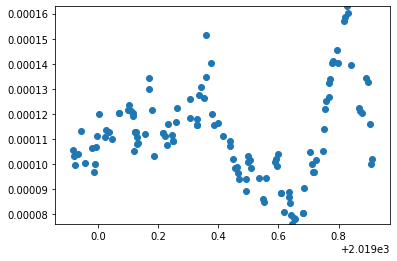

7124.995366769276
22816


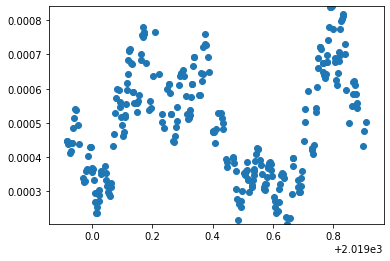

7208.877939170942
31680


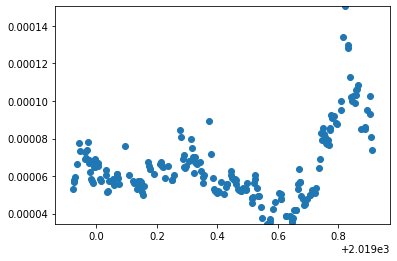

7024.240530595141
31512


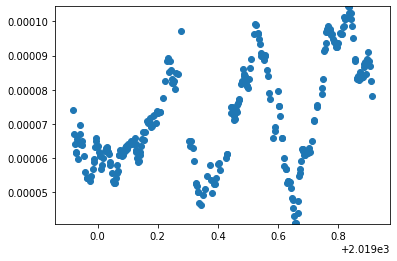

7152.770090648742
36131


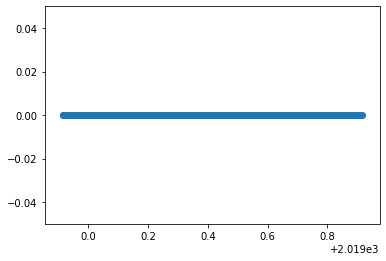

42166.96975399345
13579


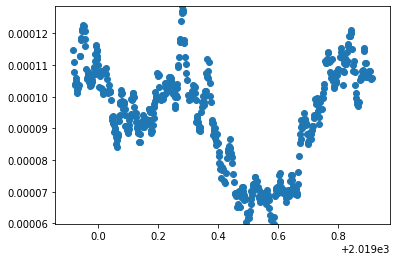

7199.891678067373
43288


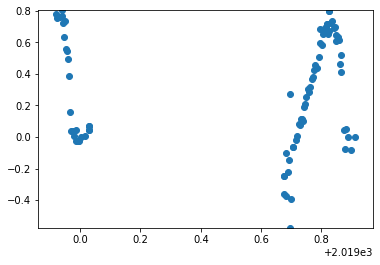

9997.835361429406
26989


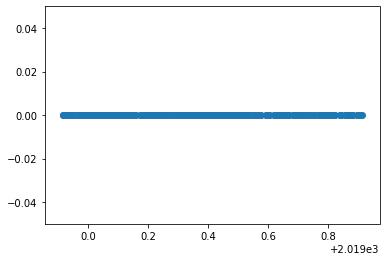

25507.93593070367
14209


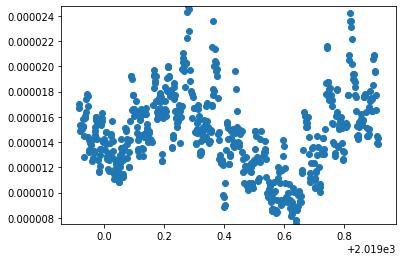

6889.74854558159
12627


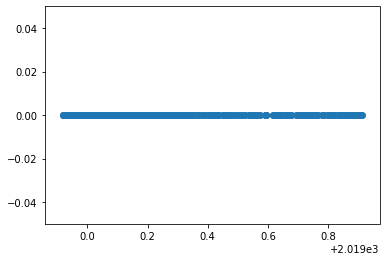

26784.366168097742
27470


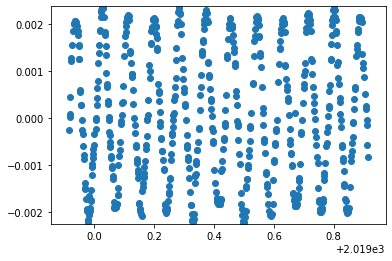

8028.790812684952
42063


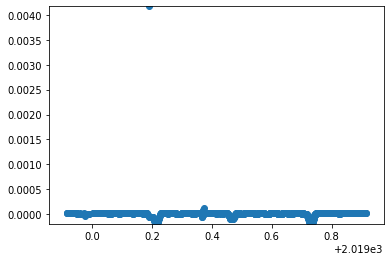

7167.164265788605
39897


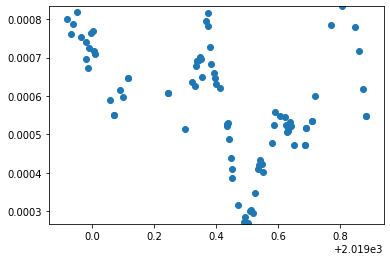

7194.1921167053815
43761


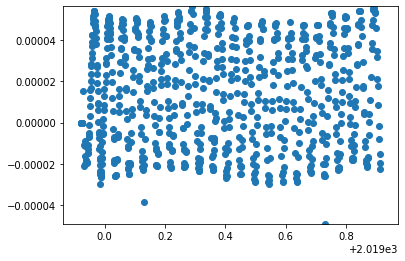

6960.941289564523
41874


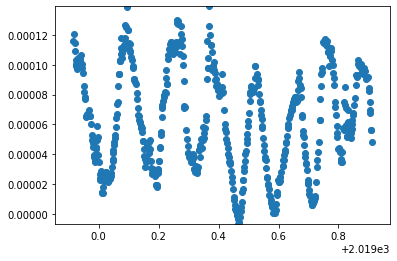

6870.693177298302
38820


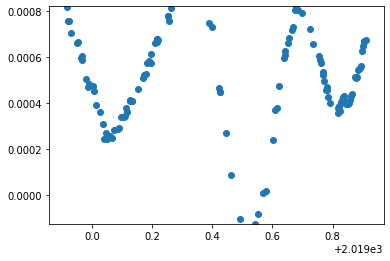

7348.771637736407
41659


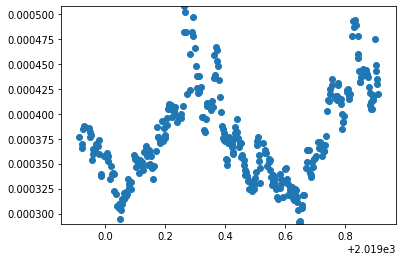

7219.923449004528
8918


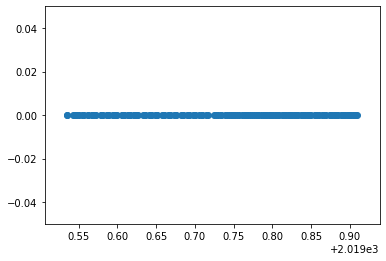

42089.176828110074
31840


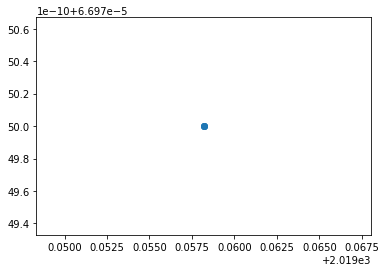

7296.239098926244
31482


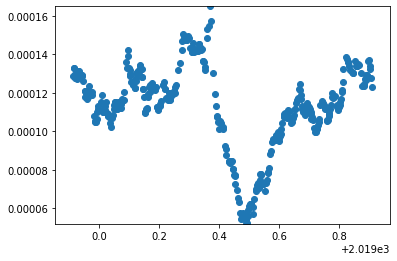

7179.306287825118
25542


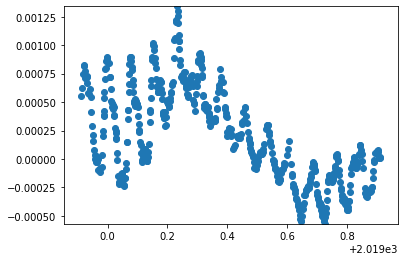

24124.14065245481
12544


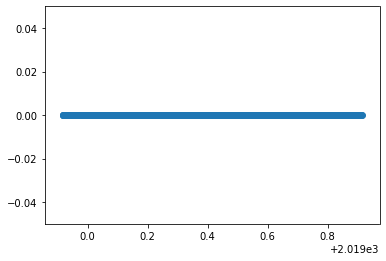

42604.9133486018
31776


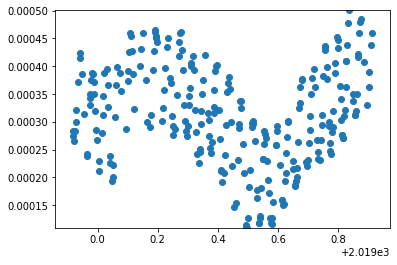

7247.036142945644
24279


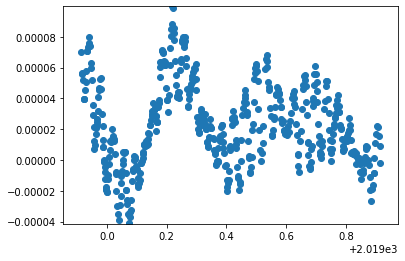

7461.015178114031
42090


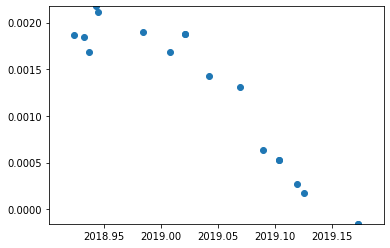

7882.650652581884
22609


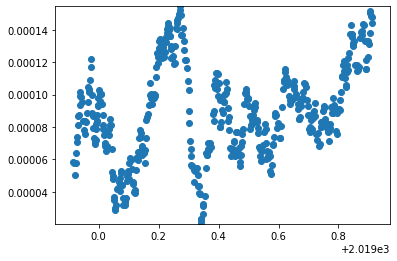

7317.029458598947
12175


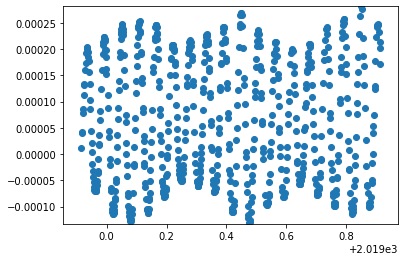

7286.612543927181
41148


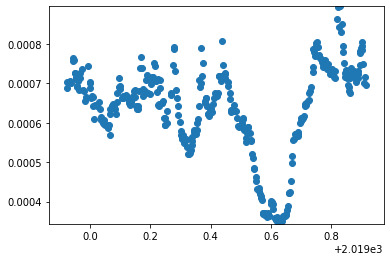

7138.906588627203
36713


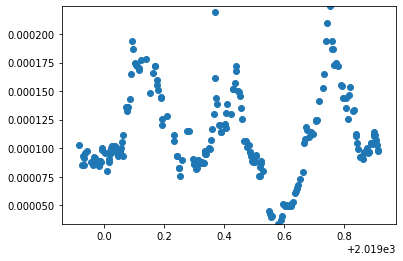

7048.210078583908
10844


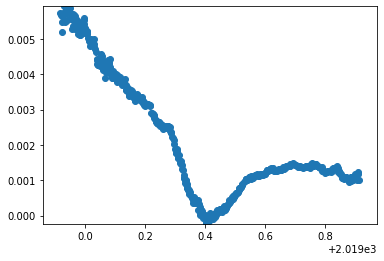

7432.949922523744
32029


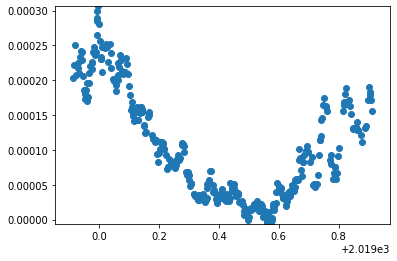

14012.424317322491
23832


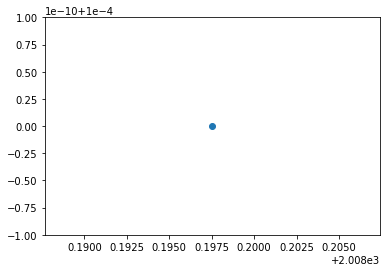

9998.993520911321
26091


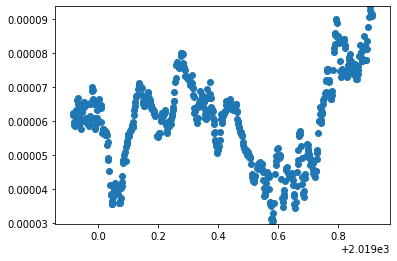

7107.174815172718


In [287]:
for x in range(100):
    dfinter = list(set(dfprop.NORAD_CAT_ID.astype(str).unique()).intersection(set(df.norad.unique())))
    x = random.randint(0,len(dfinter) - 1)
    el = str(dfinter[x]) #29517 ## 35903, 35904, 35946!!!, 24812 #### decay 43757, 43295 # test 39764 # difficult 43195 
    #el = str(35230)
    # 43111 chaotic # unclear 40015
    # inc of 35250 interesting, 42122, 44240, 44316, 42063
    #el = str(list(df.norad.unique())[2])
    print(str(el))
    dfsub = df[df.norad == el]
    list1 = dfsub.epoch_year
    #if len(list1) > 100:
    date = list1 + dfsub.epoch_day / 366
    #plt.scatter(date, dfsub.ecc)
    apo = apogeecal(dfsub.n, dfsub.ecc)
    per = perigeecal(dfsub.n, dfsub.ecc)
    #plt.scatter(date, apo)
    #plt.scatter(date, per)
    plt.scatter(date, dfsub.bstar)
    #plt.ylim(-0.001, 0.001)
    #plt.ylim(0.425,0.43)
    #plt.ylim(apo.min()*(1-0.000001), apo.max()*(1+0.000001))
    #plt.xlim(2019.4,2019.6)
    #plt.ylim(per.min()*(1-0.000001), per.max()*(1+0.000001))
    plt.ylim(dfsub.bstar.min()*(1-0.000001), dfsub.bstar.max()*(1+0.000001))
    plt.show()
    print(apo.max())
    time.sleep(1)

In [ ]:
42063,39897

In [258]:
df[(df.ecc <= 0.25) & (df.n >= 12) & (df.n <= 14)].n.count()

2185179

In [276]:
df[df.norad == '37231']
dfprop[dfprop.NORAD_CAT_ID == '37231']
#set([37231]).issubset(set(dfprop.NORAD_CAT_ID.unique()))

Empty DataFrame
Columns: [OBJECT_ID, OBJECT_NAME, NORAD_CAT_ID, COUNTRY, PERIOD, INCLINATION, APOGEE, PERIGEE, RCS_SIZE, RCSVALUE, LAUNCH, COMMENT]
Index: []

In [ ]:
# Save the DataFrame to a file
import pickle
pickle.dump( df, open( 'df_tot7.p', 'wb' ) )
#df_tot8 = pickle.load(open('df_tot7.p', 'rb'))

In [ ]:
import pickle
df1 = pickle.load(open('df_tot7.p', 'rb'))